## Capstone Project -  Predicting House price
***

### Problem statement:
A house value is simply more than location and square footage. Like the features that make
up a person, an educated party would want to know all aspects that give a house its value. For
example, you want to sell a house and you don’t know the price which you can take — it can’t
be too low or too high. To find house price you usually try to find similar properties in your
neighbourhood and based on gathered data you will try to assess your house price.

In [4]:
#supress warning
import folium
from folium import plugins
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import os
import plotly.offline as py
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.figure_factory as ff
from IPython.core.display import display, HTML
init_notebook_mode(connected=True)

#Limiting floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 
import seaborn as sns
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import iqr, zscore,norm
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import train_test_split,KFold, cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from xgboost.sklearn import XGBRegressor

from scipy.stats import randint as sp_randint
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')


In [5]:
#os.chdir(r"D:\Data Science\Great Lakes Project\CapstoneProject")

In [6]:
# Load the Diabetes Dataset
# reading the CSV file into pandas dataframe and parse date column 
housing_df = pd.read_csv(r"C:\Users\Akshay Deshmukh\Desktop\Great Learning\Capstone House Price Prediction\innercity.csv")

In [7]:
house_df = housing_df.copy()

In [8]:
# Display first 10 rows of dataset
housing_df.head(10)

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666  20141107T000000  808100         4      3.250            3020   
1  8731981640  20141204T000000  277500         4      2.500            2550   
2  5104530220  20150420T000000  404000         3      2.500            2370   
3  6145600285  20140529T000000  300000         2      1.000             820   
4  8924100111  20150424T000000  699000         2      1.500            1400   
5  5525400430  20140715T000000  585000         3      2.500            2050   
6  2419600075  20141201T000000  465000         3      1.750            1480   
7   114101161  20140829T000000  480000         3      1.500            2100   
8  7011201550  20140707T000000  780000         4      2.000            2600   
9  7203000640  20140918T000000  215000         4      1.000            1130   

   lot_measure  ceil  coast  sight  ...  basement  yr_built  yr_renovated  \
0        13457 1.000      0      0  ...         0      1956             0   
1         7500 1.000      0      0  ...       800      1976             0   
2         4324 2.000      0      0  ...         0      2006             0   
3         3844 1.000      0      0  ...         0      1916             0   
4         4050 1.000      0      0  ...         0      1954             0   
5        11690 2.000      0      0  ...         0      1989             0   
6         6360 1.000      0      0  ...         0      1954             0   
7        67269 1.000      0      0  ...       880      1949             0   
8         4800 1.000      0      2  ...      1200      1953             0   
9         7400 1.000      0      0  ...         0      1969             0   

   zipcode    lat     long  living_measure15  lot_measure15  furnished  \
0    98133 47.717 -122.336              2120           7553          1   
1    98023 47.316 -122.386              2260           8800          0   
2    98038 47.352 -121.999              2370           4348          0   
3    98133 47.705 -122.349              1520           3844          0   
4    98115 47.677 -122.269              1900           5940          0   
5    98059 47.528 -122.161              2410          10172          1   
6    98133 47.731 -122.353              1480           6360          0   
7    98028 47.759 -122.230              1610          15999          0   
8    98119 47.637 -122.371              2050           3505          0   
9    98003 47.344 -122.316              1540           7379          0   

   total_area  
0       16477  
1       10050  
2        6694  
3        4664  
4        5450  
5       13740  
6        7840  
7       69369  
8        7400  
9        8530  

[10 rows x 23 columns]

# Above Data file containes below features.

1. cid: a notation for a house
1. dayhours: Date house was sold
1. price: Price is prediction target
1. room_bed: Number of Bedrooms/House
1. room_bath: Number of bathrooms/bedrooms
1. living_measure: square footage of the home
1. lot_measure: quare footage of the lot
1. ceil: Total floors (levels) in house
1. coast: House which has a view to a waterfront
1. sight: Has been viewed
1. condition: How good the condition is (Overall)
1. quality: grade given to the housing unit, based on grading system
1. ceil_measure: square footage of house apart from basement
1. basement_measure: square footage of the basement
1. yr_built: Built Year
1. yr_renovated: Year when house was renovated
1. zipcode: zip
1. lat: Latitude coordinate
1. long: Longitude coordinate
1. living_measure15: Living room area in 2015(implies-- some renovations) This might
   or might not have affected the lotsize area
1. lot_measure15: lotSize area in 2015(implies-- some renovations)
1. furnished: Based on the quality of room 
1. total_area: Measure of both living and lot

So now we have data, let's define steps before jumping into model building

* <b>Understand the data:</b> We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
* <b>Univariable study:</b> We'll just focus on the dependent variable ('price') and try to know a little bit more about it.
* <b>Multivariate study:</b> We'll try to understand the relation between dependent variable and independent variables.
Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
* <b>Test assumptions:</b> We'll check if our data meets the assumptions required by most multivariate techniques.

# Explodatory Data Analysis (EDA)

## 5 Point Summary
- We can drop cid as it is just an id attribute

In [9]:
housing_df.drop('cid',axis=1).describe().transpose()

count       mean        std       min        25%  \
price            21613.000 540182.159 367362.232 75000.000 321950.000   
room_bed         21613.000      3.371      0.930     0.000      3.000   
room_bath        21613.000      2.115      0.770     0.000      1.750   
living_measure   21613.000   2079.900    918.441   290.000   1427.000   
lot_measure      21613.000  15106.968  41420.512   520.000   5040.000   
ceil             21613.000      1.494      0.540     1.000      1.000   
coast            21613.000      0.008      0.087     0.000      0.000   
sight            21613.000      0.234      0.766     0.000      0.000   
condition        21613.000      3.409      0.651     1.000      3.000   
quality          21613.000      7.657      1.175     1.000      7.000   
ceil_measure     21613.000   1788.391    828.091   290.000   1190.000   
basement         21613.000    291.509    442.575     0.000      0.000   
yr_built         21613.000   1971.005     29.373  1900.000   1951.000   
yr_renovated     21613.000     84.402    401.679     0.000      0.000   
zipcode          21613.000  98077.940     53.505 98001.000  98033.000   
lat              21613.000     47.560      0.139    47.156     47.471   
long             21613.000   -122.214      0.141  -122.519   -122.328   
living_measure15 21613.000   1986.552    685.391   399.000   1490.000   
lot_measure15    21613.000  12768.456  27304.180   651.000   5100.000   
furnished        21613.000      0.197      0.398     0.000      0.000   
total_area       21613.000  17186.867  41589.081  1423.000   7035.000   

                        50%        75%         max  
price            450000.000 645000.000 7700000.000  
room_bed              3.000      4.000      33.000  
room_bath             2.250      2.500       8.000  
living_measure     1910.000   2550.000   13540.000  
lot_measure        7618.000  10688.000 1651359.000  
ceil                  1.500      2.000       3.500  
coast                 0.000      0.000       1.000  
sight                 0.000      0.000       4.000  
condition             3.000      4.000       5.000  
quality               7.000      8.000      13.000  
ceil_measure       1560.000   2210.000    9410.000  
basement              0.000    560.000    4820.000  
yr_built           1975.000   1997.000    2015.000  
yr_renovated          0.000      0.000    2015.000  
zipcode           98065.000  98118.000   98199.000  
lat                  47.572     47.678      47.778  
long               -122.230   -122.125    -121.315  
living_measure15   1840.000   2360.000    6210.000  
lot_measure15      7620.000  10083.000  871200.000  
furnished             0.000      0.000       1.000  
total_area         9575.000  13000.000 1652659.000

## Null value check

- We do not have null value in any of above feature,where as we have 0 values.
- We should impute these 0 values, depending on feature.

In [10]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

## 1.Missing data analysis

Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [11]:
#missing data => Find total rows having missing values and calculate the percentage of missing values for each field.
total = housing_df.isnull().sum().sort_values(ascending=False)
percent = (housing_df.isnull().sum()/housing_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
total_area          0    0.000
condition           0    0.000
dayhours            0    0.000
price               0    0.000
room_bed            0    0.000
room_bath           0    0.000
living_measure      0    0.000
lot_measure         0    0.000
ceil                0    0.000
coast               0    0.000
sight               0    0.000
quality             0    0.000
furnished           0    0.000
ceil_measure        0    0.000
basement            0    0.000
yr_built            0    0.000
yr_renovated        0    0.000
zipcode             0    0.000
lat                 0    0.000
long                0    0.000

## Zero value analysis

<u>Non-considerable zero value in field</u>
* room_bed with 13 zero seems missing value,as we can not have house without any bed room.
* room_bath is having 10 zero values seems missing value,as we can not have house without any bath room.
* age is having 430 zero values may be missing value or actual value,as house can be built and sold in same year.

<u>Considerable zero value in fields</u>
* coast is having 21450 zero values,but we can not take it as missing value, as there can house without coast facing.
* sight is having 21450 zero values,but we can not take it as missing value, as there can house which are not visited once.
* basement is having 21450 zero values,but we can not take it as missing value,as there can house without basement.Basement in US prefered.
* yr_renovated is having 21450 zero values,but we can not take it as missing value,as there can house which are not enovated once and got soled
* furnished is having 21450 zero values,but we can not take it as missing value,as there can house which are not furnished and got sold.

In [12]:
# Lets analyse zero values

for col in housing_df.columns:
    if housing_df[col].dtypes == 'int64' or housing_df[col].dtypes == 'float64':
        if np.count_nonzero(housing_df[col]==0):
            print('Number of 0-entries for "{field_name}" feature:{amount}'.format(
                field_name=col,amount=np.count_nonzero(housing_df[col]==0) ))

Number of 0-entries for "room_bed" feature:13
Number of 0-entries for "room_bath" feature:10
Number of 0-entries for "coast" feature:21450
Number of 0-entries for "sight" feature:19489
Number of 0-entries for "basement" feature:13126
Number of 0-entries for "yr_renovated" feature:20699
Number of 0-entries for "furnished" feature:17362


## 2.Outliers analysis

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'price' and a set of scatter plots.

In [13]:
def checkIQR(data):
    print("Attributes for which values lie outside of IQR")
    for field in housing_df.columns:
        if housing_df[field].dtypes == 'int64' or housing_df[field].dtypes == 'float64':
            Q1 = data[field].quantile(0.25)
            Q3 = data[field].quantile(0.75)
            current_iqr = iqr(data[field], rng=(25,75), interpolation='midpoint')
            iqr_analysis = (data[field] < (Q1 - 1.5 * current_iqr)) |(data[field] > (Q3 + 1.5 * current_iqr))
            if (iqr_analysis == True).any() == True:
                print('{field_name} : {flag}'.format(field_name=field,flag=sum(iqr_analysis)))
checkIQR(housing_df)

Attributes for which values lie outside of IQR
price : 1159
room_bed : 546
room_bath : 571
living_measure : 572
lot_measure : 2425
coast : 163
sight : 2124
condition : 30
quality : 1911
ceil_measure : 611
basement : 496
yr_renovated : 914
lat : 2
long : 256
living_measure15 : 544
lot_measure15 : 2194
furnished : 4251
total_area : 2419


Below attributes are having high number of values as outliers
* total_area
* lot_measure
* lot_measure15
* price
* yr_renovated

<AxesSubplot:xlabel='yr_renovated'>

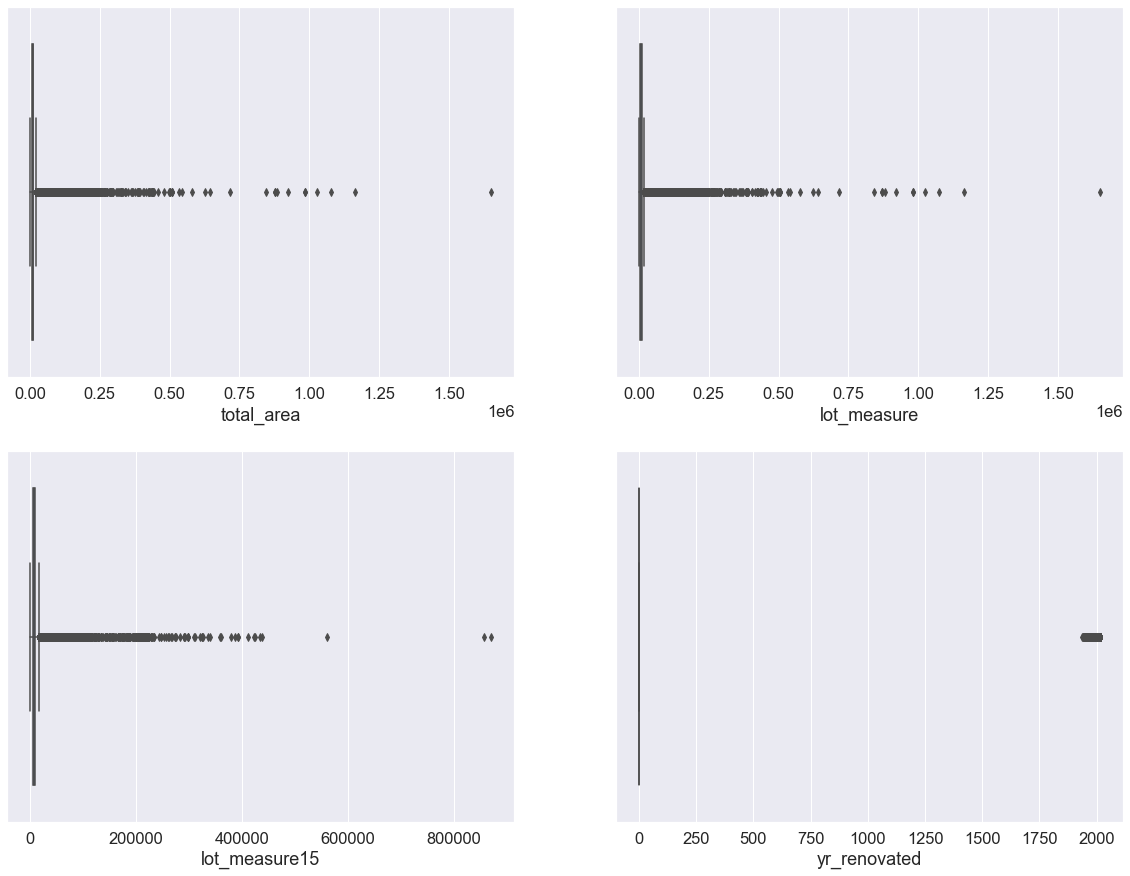

In [14]:
# Box plot to see outliers pattern in the data. 

fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); 
sns.boxplot(housing_df.total_area, data=housing_df)

fig2 = fig.add_subplot(222); 
sns.boxplot(housing_df.lot_measure, data=housing_df)

fig3 = fig.add_subplot(223); 
sns.boxplot(housing_df.lot_measure15, data=housing_df)

fig4 = fig.add_subplot(224);
sns.boxplot(housing_df.yr_renovated, data=housing_df)

In [15]:
# Let's convert dayhours with dddd/mm/yy and create new feature with year

housing_df.dayhours = housing_df.dayhours.str.extract(r'(\d{4}\d{2}\d{2})')
housing_df.dayhours =  pd.to_datetime(housing_df.dayhours)
housing_df['yr_sold'] = housing_df.dayhours.dt.year
housing_df.head()

cid   dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666 2014-11-07  808100         4      3.250            3020   
1  8731981640 2014-12-04  277500         4      2.500            2550   
2  5104530220 2015-04-20  404000         3      2.500            2370   
3  6145600285 2014-05-29  300000         2      1.000             820   
4  8924100111 2015-04-24  699000         2      1.500            1400   

   lot_measure  ceil  coast  sight  ...  yr_built  yr_renovated  zipcode  \
0        13457 1.000      0      0  ...      1956             0    98133   
1         7500 1.000      0      0  ...      1976             0    98023   
2         4324 2.000      0      0  ...      2006             0    98038   
3         3844 1.000      0      0  ...      1916             0    98133   
4         4050 1.000      0      0  ...      1954             0    98115   

     lat     long  living_measure15  lot_measure15  furnished  total_area  \
0 47.717 -122.336              2120           7553          1       16477   
1 47.316 -122.386              2260           8800          0       10050   
2 47.352 -121.999              2370           4348          0        6694   
3 47.705 -122.349              1520           3844          0        4664   
4 47.677 -122.269              1900           5940          0        5450   

   yr_sold  
0     2014  
1     2014  
2     2015  
3     2014  
4     2015  

[5 rows x 24 columns]

## Distribution analysis
    we have created below columns to understand the distribution of data.
    1. types - data type of the feature.
    2. counts - total count of records for that feature.
    3. distincts - total number of distinct value for that feature.
    4. uniques - all unique values in that feature.
    5. skewness - skewness of the data for all features.
    6. kurtosis - meaure of tailedness from the data for all features.
    7. corr_price - correlation of each feature with target variable 'price'

## Histogram Plot of dependent variable

<AxesSubplot:xlabel='price', ylabel='Density'>

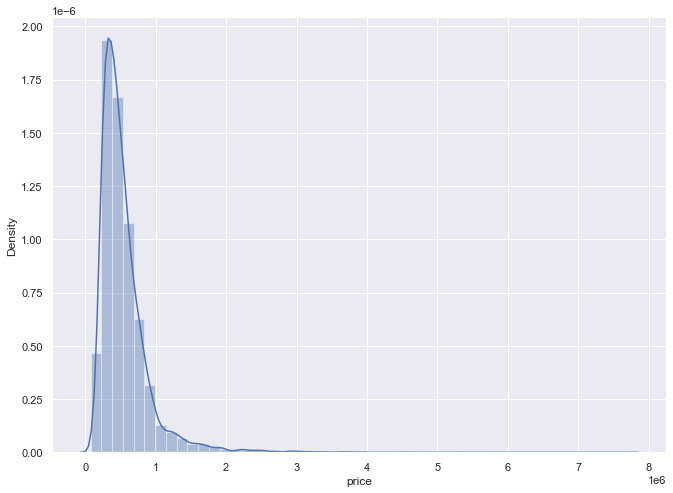

In [16]:
sns.set(rc={'figure.figsize': (11, 8)})
sns.distplot(housing_df['price'],hist=True, kde=True)

Skewness is a measure of the symmetry in a distribution. ... It measures the amount of probability in the tails. The value is often compared to the kurtosis of the normal distribution, which is equal to 3. If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution

In [17]:
print("Skewness: %f" % housing_df['price'].skew())
print("Kurtosis: %f" % housing_df['price'].kurt())

Skewness: 4.021716
Kurtosis: 34.522444


In [124]:
def rstr(df, pred=None): 
    
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: len(x.unique()))
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred == None:
        cols = ['types', 'counts', 'distincts', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, uniques, skewness, kurtosis], axis = 1)
        print(str)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, uniques, skewness, kurtosis, corr], axis = 1)
        corr_col = 'corr_'  + pred
        cols = ['types', 'counts', 'distincts','uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\n')
    print('Data types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [126]:
details = rstr(housing_df, 'price')
display(details.sort_values(by='corr_price', ascending=False))

Data shape: (21613, 24)
___________________________

Data types:
 int64             19
float64            4
datetime64[ns]     1
Name: types, dtype: int64
___________________________


types  counts  distincts  uniques  skewness  \
price                      int64   21613       3625     3625     4.022   
living_measure             int64   21613       1038     1038     1.472   
quality                    int64   21613         12       12     0.771   
ceil_measure               int64   21613        946      946     1.447   
living_measure15           int64   21613        777      777     1.108   
furnished                  int64   21613          2        2     1.526   
room_bath                float64   21613         30       30     0.511   
sight                      int64   21613          5        5     3.396   
basement                   int64   21613        306      306     1.578   
room_bed                   int64   21613         13       13     1.974   
lat                      float64   21613       5034     5034    -0.485   
coast                      int64   21613          2        2    11.385   
ceil                     float64   21613          6        6     0.616   
yr_renovated               int64   21613         70       70     4.549   
total_area                 int64   21613      11163    11163    12.956   
lot_measure                int64   21613       9782     9782    13.060   
lot_measure15              int64   21613       8689     8689     9.507   
yr_built                   int64   21613        116      116    -0.470   
condition                  int64   21613          5        5     1.033   
long                     float64   21613        752      752     0.885   
yr_sold                    int64   21613          2        2     0.757   
cid                        int64   21613      21436    21436     0.243   
zipcode                    int64   21613         70       70     0.406   
dayhours          datetime64[ns]   21613        372      372       nan   

                  kurtosis  corr_price  
price               34.522       1.000  
living_measure       5.243       0.702  
quality              1.191       0.667  
ceil_measure         3.402       0.606  
living_measure15     1.597       0.585  
furnished            0.329       0.566  
room_bath            1.280       0.525  
sight               10.893       0.397  
basement             2.716       0.324  
room_bed            49.064       0.308  
lat                 -0.676       0.307  
coast              127.632       0.266  
ceil                -0.485       0.257  
yr_renovated        18.701       0.126  
total_area         281.216       0.105  
lot_measure        285.078       0.090  
lot_measure15      150.763       0.082  
yr_built            -0.657       0.054  
condition            0.526       0.036  
long                 1.050       0.022  
yr_sold             -1.427       0.004  
cid                 -1.261      -0.017  
zipcode             -0.853      -0.053  
dayhours               nan         nan

* The dependent variabel, price, are skewed and heavy-tailed distribution. We need investigate its distribution with the plots and check if a transformation by Log 1P could correct it, without dropping most of the outiliers.

<b>Features high correlation to Sales Price</b>
* living_measure

<b>Features with good correlation to Sales Price</b>
* quality
* ceil_measure

<b>Features with week correlation to Sales Price</b>
* living_measure15
* furnished
* room_bath

## 3. Correlation Analysis
correlation coefficient measures a degree of relation between two variables, it only measures the linear relationship between the variables.

A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive

A correlation of 0.0 shows zero or no relationship between the movement of the two variables.
From above stats we saw skewness and correlation of fields with price.

Let's understand the correlation from heatmap. This heatmap is the best way to get a quick overview to understand the relationship between dependent and independent variable.


At first sight, there are two "" colored squares that get my attention. The first one refers to the 'lot_messaure' and 'total_area' variables, and the second one refers to the 'living_measure' and 'ceil_mesaure' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got our attention was the 'price' correlations. We can see our well-known 'living_measure', 'Quality', and 'ceil_mesaure' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

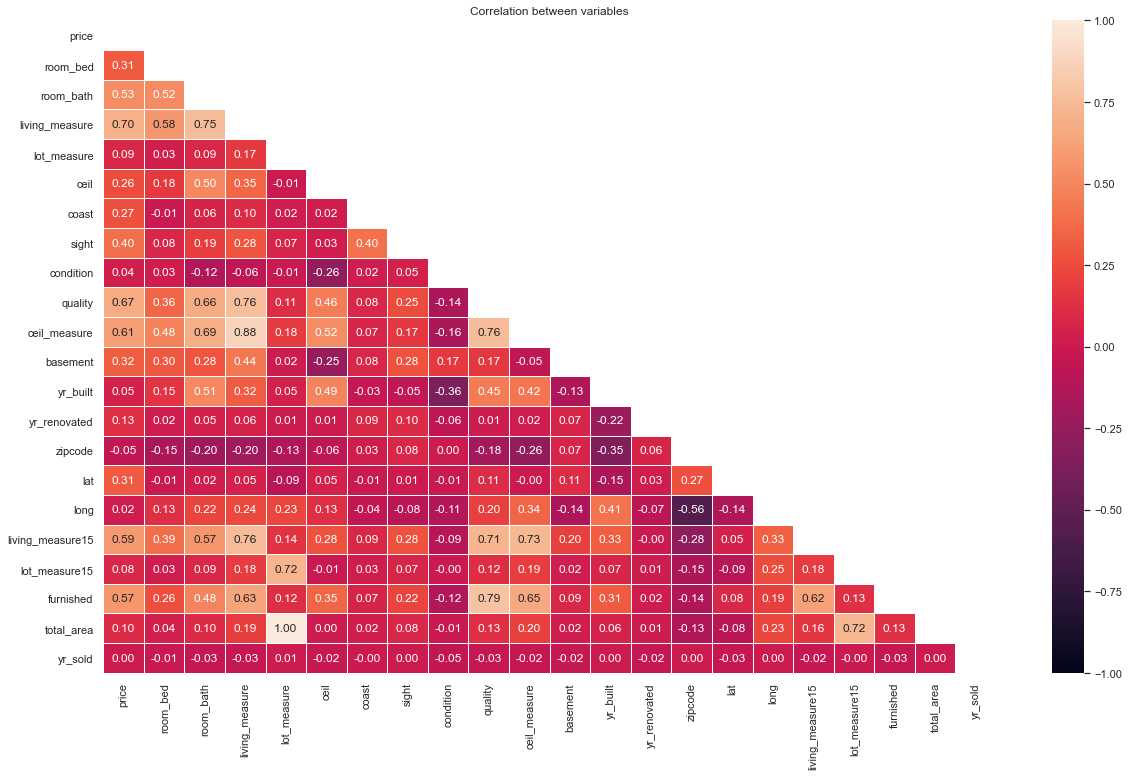

In [127]:
housing_df_drop = housing_df.drop('cid',axis=1)
corr = housing_df_drop.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (20,12))
with sns.axes_style("white"):
    sns.heatmap(corr,annot=True,linewidth=1,mask = mask,vmax=1,vmin=-1,fmt='.2f')
    plt.title("Correlation between variables")
    plt.show()

# Year wise House sold plot

1. We have less entries for year 2015 compared to 2014
1. We do not see much difference between central tendency of house price in the year 2014 and 2015 is visible.

In [128]:
tmp1 = housing_df[housing_df['yr_sold'] == 2014]['price']
tmp2 = housing_df[housing_df['yr_sold'] == 2015]['price']
hist_data = [tmp1, tmp2]
group_labels = ['House Price 2014', 'House Price 2015']
colors = ['#4256f4', '#FFD700']
fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
fig['layout'].update(title = 'Distribution Plot for House price 2014 and 2015 ')
py.iplot(fig)

### Lets Start Analysis Attributes which are having High & Good corelation with Price

Attributes are
* living_measure- as living measure increases price also increases. Scatter plot show positive relation
* quality - higher the quality give higher price
* ceil_measure - Scatter plot show positive relation
* furnished - if house is furnished house draws higher price
* room_bath - we can see as the number of room_bath increases, price is also increasing.
* living_measure15 - as living_measure15 increases price also increases. Scatter plot show positive relation

<AxesSubplot:xlabel='living_measure15', ylabel='price'>

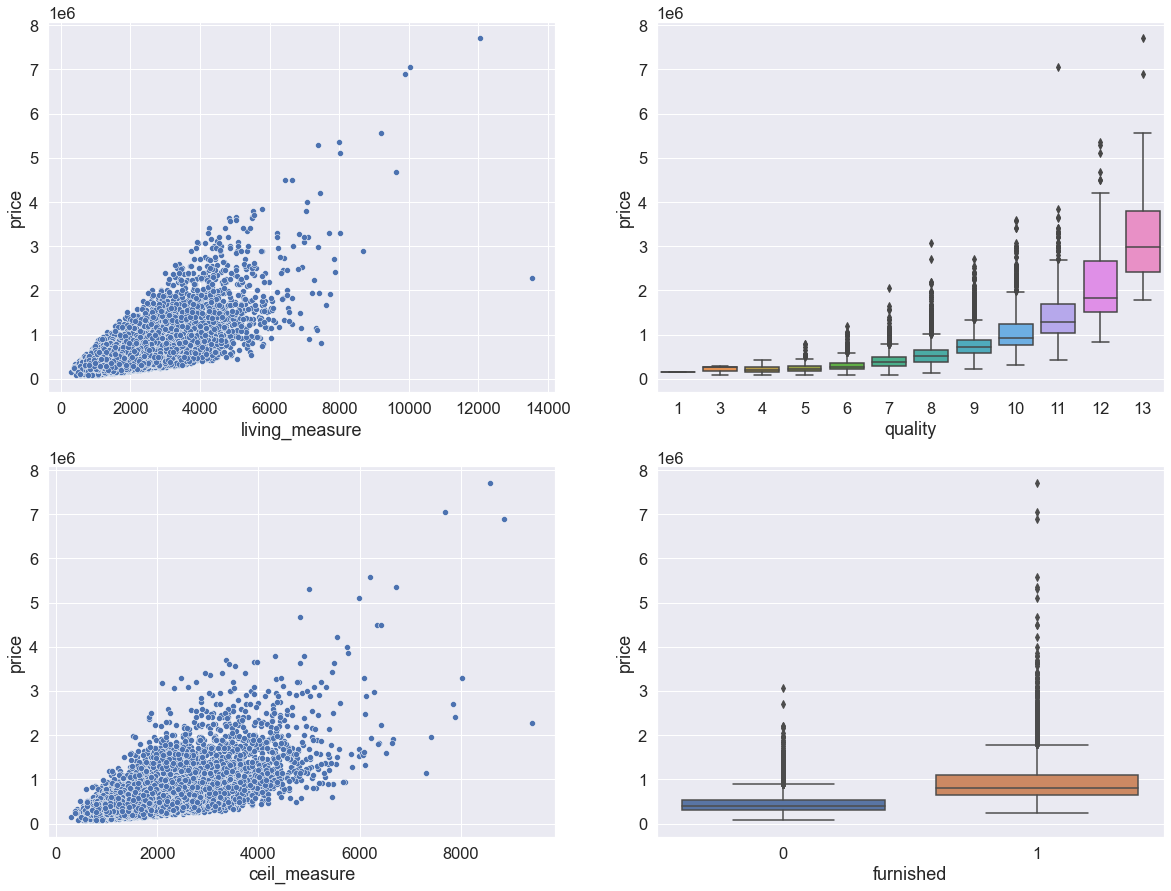

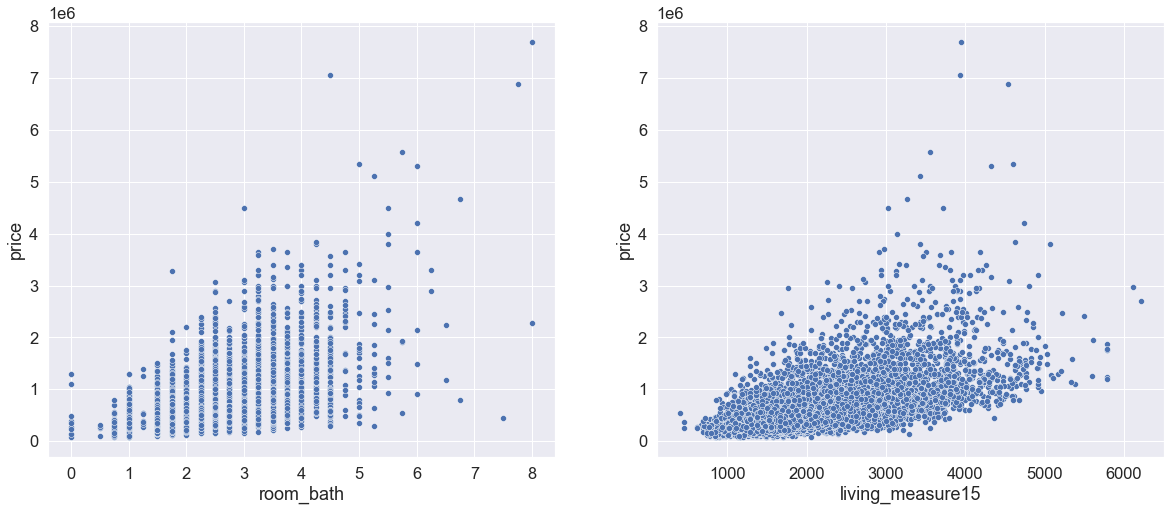

In [129]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); 
sns.scatterplot(x = housing_df.living_measure, y = housing_df.price, data=housing_df)

fig2 = fig.add_subplot(222); 
sns.boxplot(x=housing_df.quality, y=housing_df.price, data=housing_df)

fig3 = fig.add_subplot(223); 
sns.scatterplot(x = housing_df.ceil_measure, y = housing_df.price, data=housing_df)

fig4 = fig.add_subplot(224); 
sns.boxplot(x = housing_df.furnished, y = housing_df.price, data=housing_df)

fig5 = plt.figure(figsize=(20, 8))

fig6 = fig5.add_subplot(121);
sns.scatterplot(x = housing_df.room_bath, y = housing_df.price, data=housing_df)

fig7 = fig5.add_subplot(122);
sns.scatterplot(x = housing_df.living_measure15, y = housing_df.price, data=housing_df)


### Lets Start Analysis Attributes which are having week corelation with Price

Attributes are
* sight - if the sight is viewed many time the price is also high
* basement - scatter plot weak correlation with price
* room_bed - As number of room_bed are increasing, the price is also increasing.
* lat - between 47.5 to 47.8, most of the flats are sold.
* coast - if house is located near coastal side then higher is the house price
* ceil - if the floor size increase then house price also increases

<AxesSubplot:xlabel='ceil', ylabel='price'>

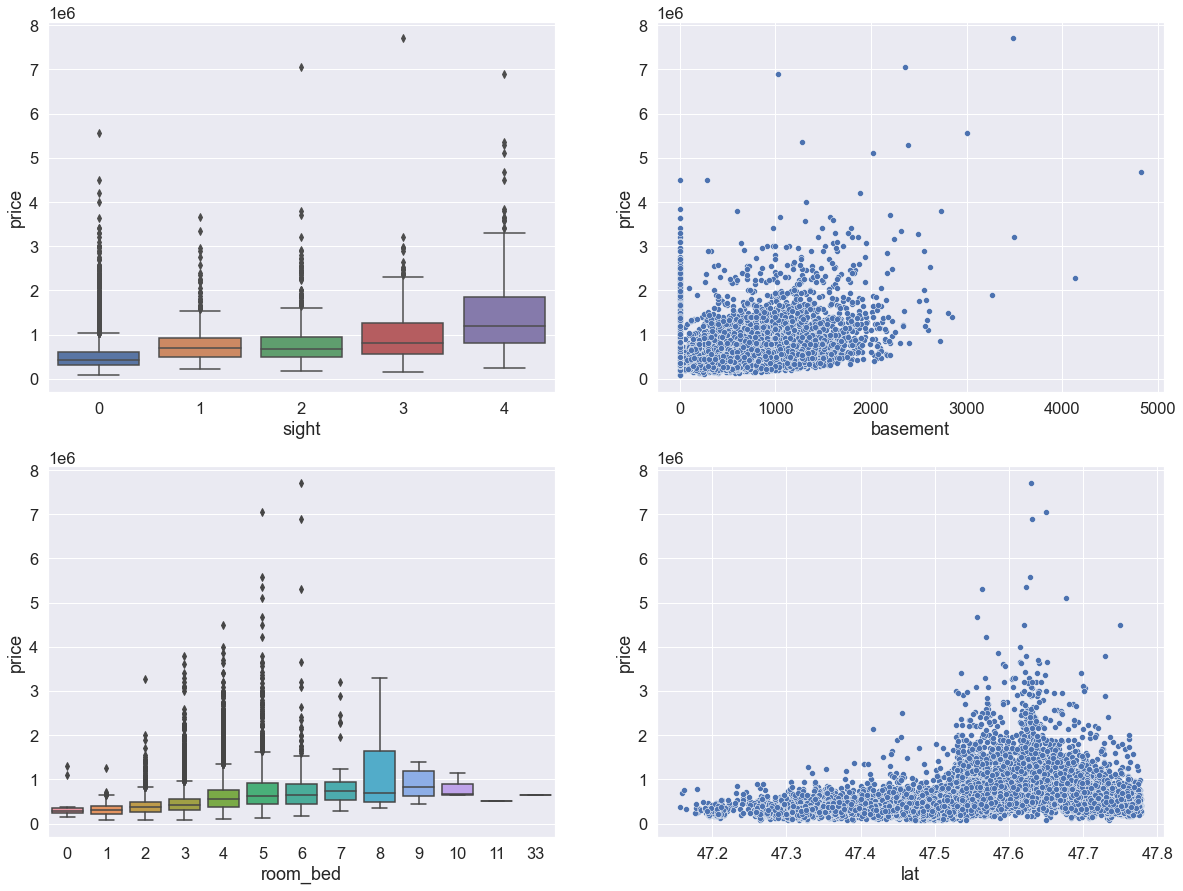

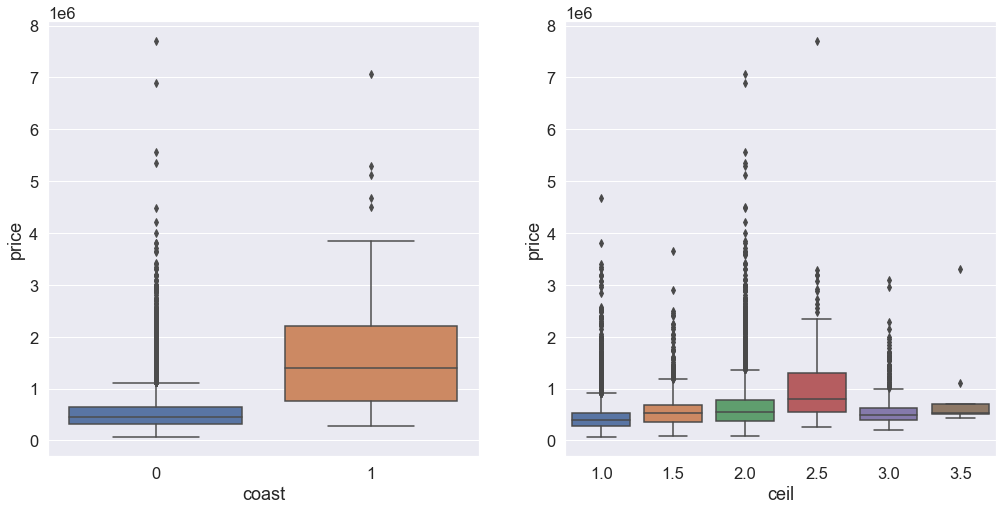

In [130]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); 
sns.boxplot(x = housing_df.sight, y = housing_df.price, data=housing_df)

fig2 = fig.add_subplot(222); 
sns.scatterplot(x=housing_df.basement, y=housing_df.price, data=housing_df)

fig3 = fig.add_subplot(223); 
sns.boxplot(x = housing_df.room_bed, y = housing_df.price, data=housing_df)

fig4 = fig.add_subplot(224); 
sns.scatterplot(x = housing_df.lat, y = housing_df.price, data=housing_df)

fig5 = plt.figure(figsize=(17, 8))

fig6 = fig5.add_subplot(121);
sns.boxplot(x = housing_df.coast, y = housing_df.price, data=housing_df)

fig7 = fig5.add_subplot(122);
sns.boxplot(x = housing_df.ceil, y = housing_df.price, data=housing_df)

### Lets Start Analysis Attributes which are having very week corelation with Price

* yr_renovated
* total_area
* lot_measure
* lot_measure15
* yr_built
* yr_sold
* condition
* long
* zipcode

We are not analysing cid and dayhours.cid because it just an unique id and dayhours as we have created new column yr_sold

<AxesSubplot:xlabel='lot_measure15', ylabel='price'>

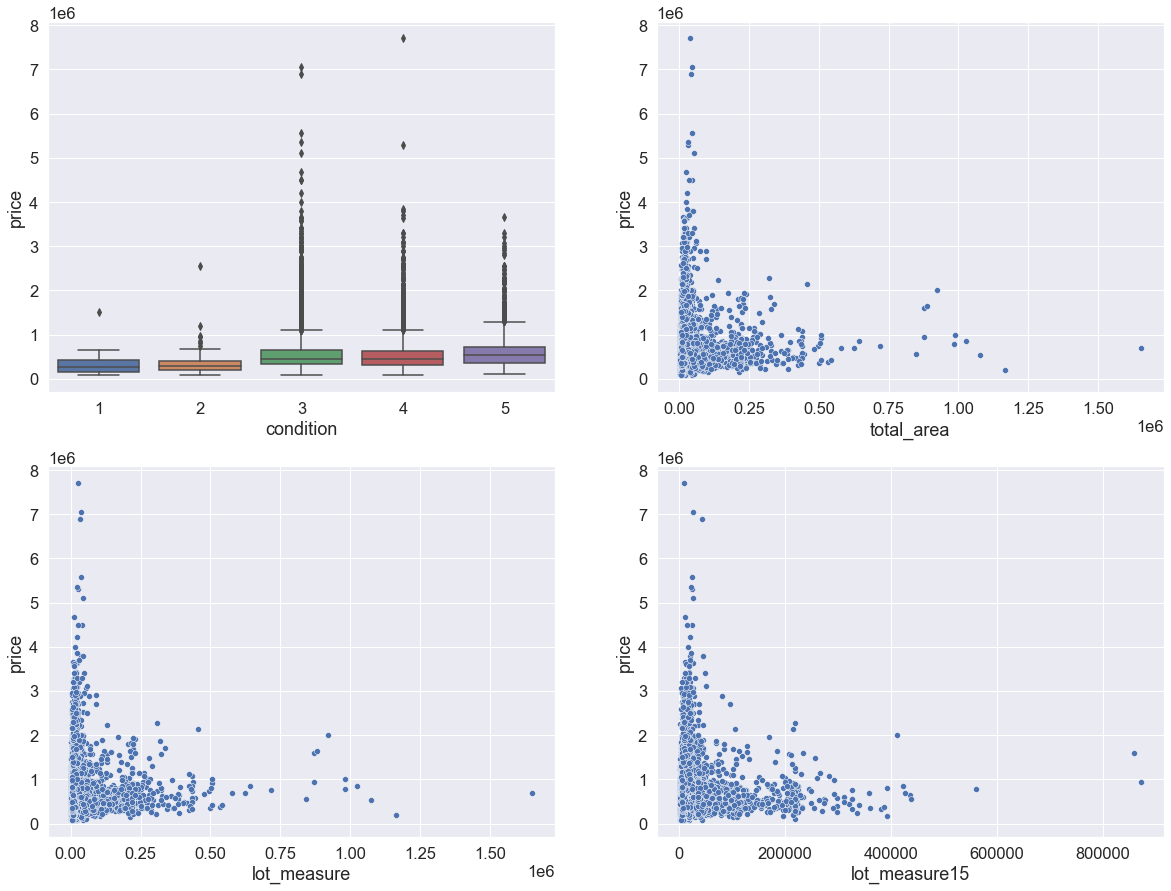

In [131]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); 
sns.boxplot(x = housing_df.condition, y = housing_df.price, data=housing_df)

fig2 = fig.add_subplot(222); 
sns.scatterplot(x=housing_df.total_area, y=housing_df.price, data=housing_df)

fig3 = fig.add_subplot(223); 
sns.scatterplot(x = housing_df.lot_measure, y = housing_df.price, data=housing_df)

fig4 = fig.add_subplot(224); 
sns.scatterplot(x = housing_df.lot_measure15, y = housing_df.price, data=housing_df)

<AxesSubplot:xlabel='long', ylabel='price'>

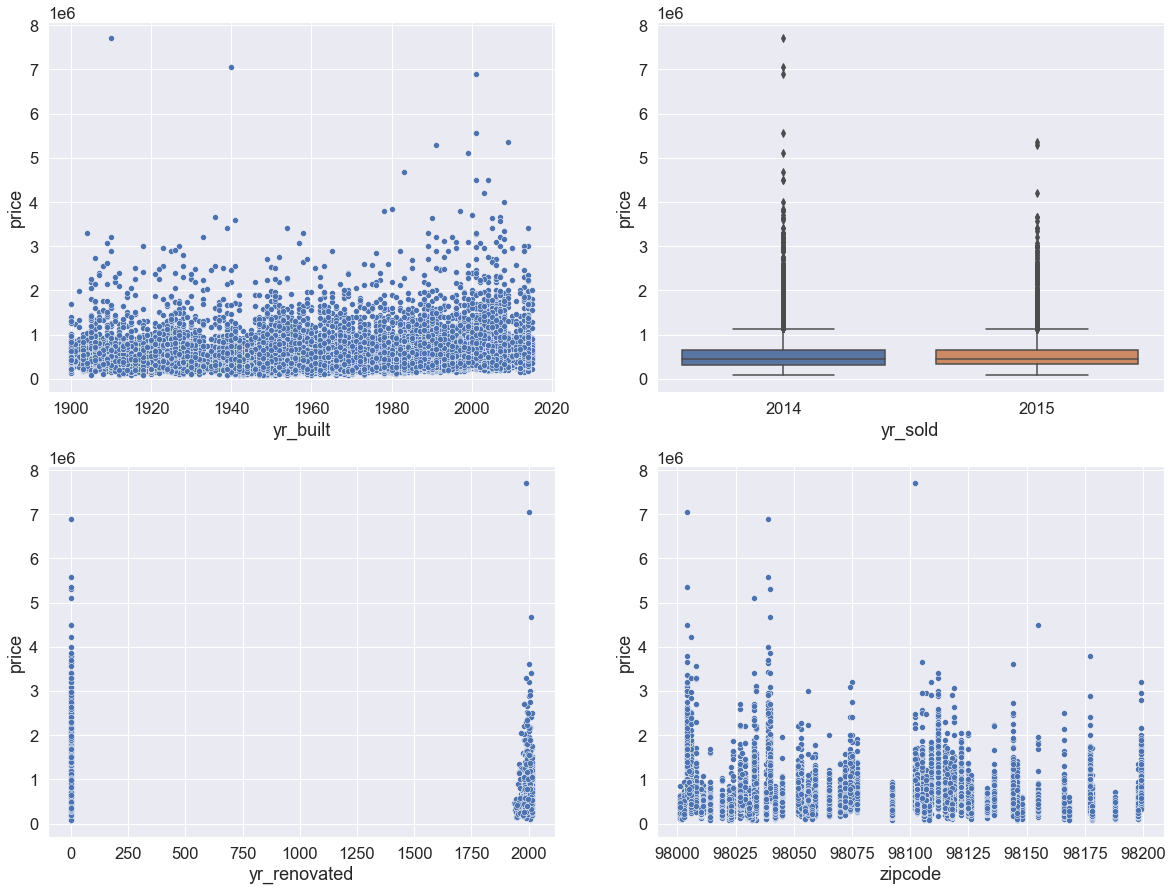

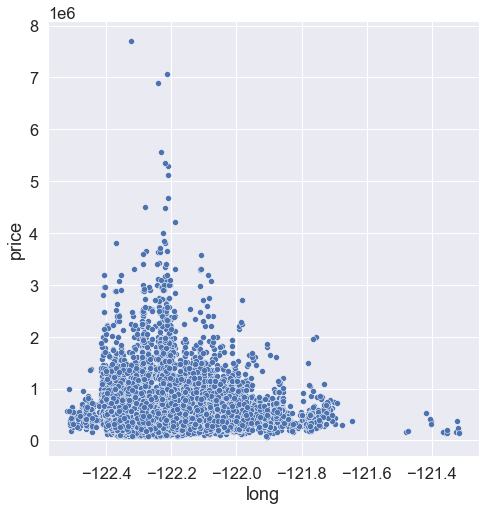

In [132]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); 
sns.scatterplot(x = housing_df.yr_built, y = housing_df.price, data=housing_df)

fig2 = fig.add_subplot(222); 
sns.boxplot(x=housing_df.yr_sold, y=housing_df.price, data=housing_df)

fig3 = fig.add_subplot(223); 
sns.scatterplot(x = housing_df.yr_renovated, y = housing_df.price, data=housing_df)

fig4 = fig.add_subplot(224); 
sns.scatterplot(x = housing_df.zipcode, y = housing_df.price, data=housing_df)

fig5 = plt.figure(figsize=(17, 8))
fig6 = fig5.add_subplot(121);
sns.scatterplot(x = housing_df.long, y = housing_df.price, data=housing_df)

### Let's evaluate living_measure,living_measure15,lot_measure15,lot_measure,total_area

As from below heatmap we found that 
* living_measure is having high correlation with living_measure15
* lot_measure is having high correlation with lot_measure15
* total_area is total of lot_measure & living_measure

So, we can drop living_measure15,lot_measure15 & total_area

<AxesSubplot:>

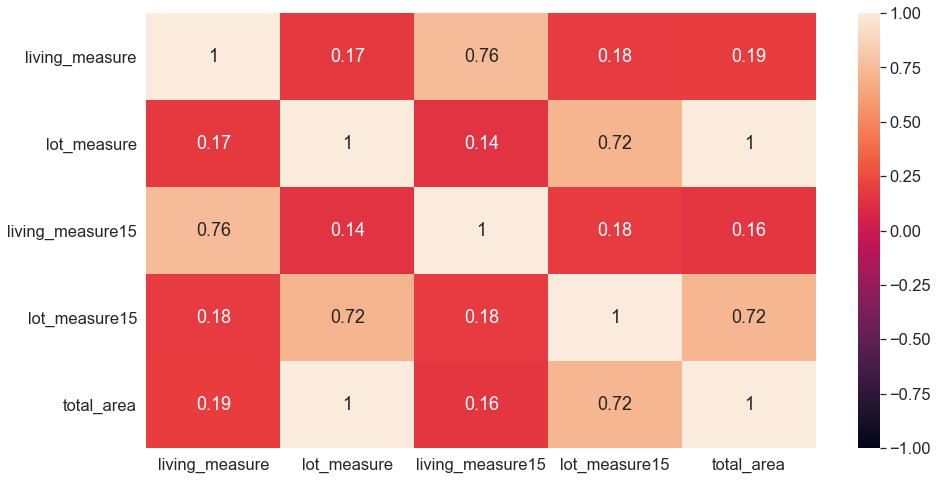

In [133]:
# As we have seen living_measure and lot_measure is having coreleation with price.
# Let's see if we have corelation between these attributes through heatmap

housing_df_space = housing_df[['living_measure','lot_measure','living_measure15','lot_measure15','total_area']].copy()
corr = housing_df_space.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True,vmax=1,vmin=-1)

# Bivariate Analysis
- lot_measure - The one value with bigger 'lot_measure' seem strange and it is not following the crowd. We can speculate why this is happening. Maybe they refer to old house and that could explain the low price. I'm not sure about this but I'm quite confident that this is not representative of the typical case. Therefore, we'll define them as outliers and we can delete them.

What has been revealed:

* The one value with bigger 'lot_measure' seem strange and it is not following the crowd. We can speculate why this is happening. Maybe they refer to old house and that could explain the low price. I'm not sure about this but I'm quite confident that this is not representative of the typical case. Therefore, we'll define them as outliers and we can delete them.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


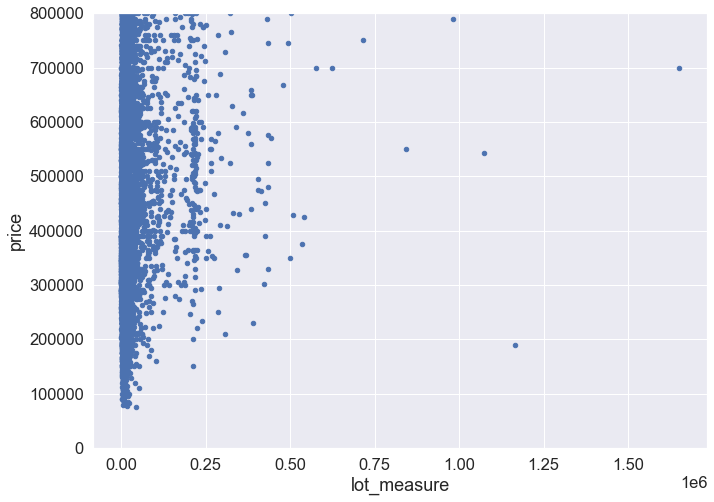

In [134]:
#bivariate analysis price/lot_measure
var = 'lot_measure'
data = pd.concat([housing_df['price'], housing_df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,800000));

lot_measure15 : lot_measure15 has many of the datapoint set zero. The column is added because after renivation area of house is changed. Also if lot_measure15 increases after renovation prices also tend to increase

What has been revealed:

* We see lot-measure data distribution is similar to lot-measure15

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


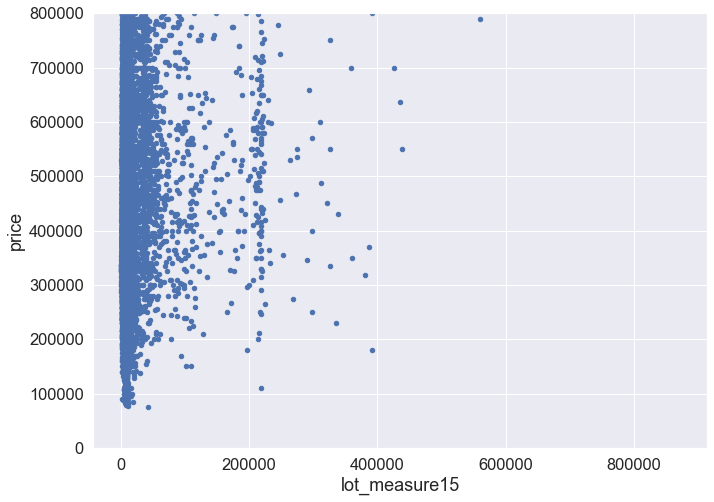

In [136]:
#bivariate analysis price/lot_measure15
var = 'lot_measure15'
data = pd.concat([housing_df['price'], housing_df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,800000));

### Let's evaluate lat,long

* We found that lat is having good corelation with price.But we know that lat and long always comes together.
* Or seems all locations are from same area. Lets evaluate...

So as predicted all locations from Mercer Island, United States of America.

Now lets evaludate if we can see any cluster so that we merge both lat & long and create single feature.But once we created cluster we have to evaluate corelation with Price

In [138]:
location = folium.Map([house_df['lat'].mean(), house_df['long'].mean()], zoom_start=15,tiles='OpenStreetMap')
location

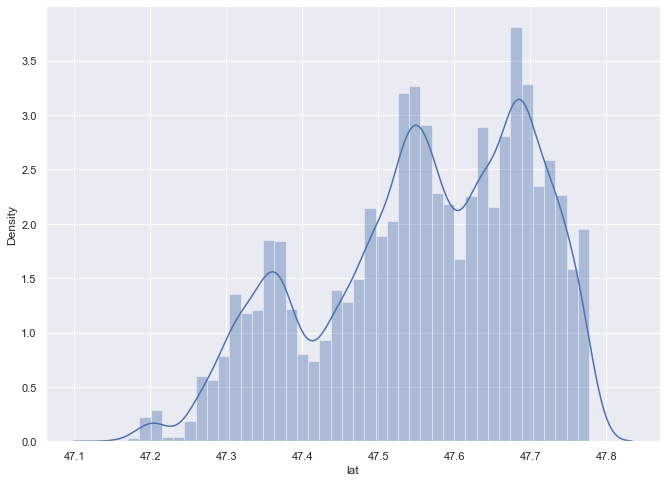

In [139]:
#histogram to undertand the distribution of latitude
sns.set(rc={'figure.figsize': (11, 8)})
sns.distplot(housing_df['lat'],hist=True, kde=True);

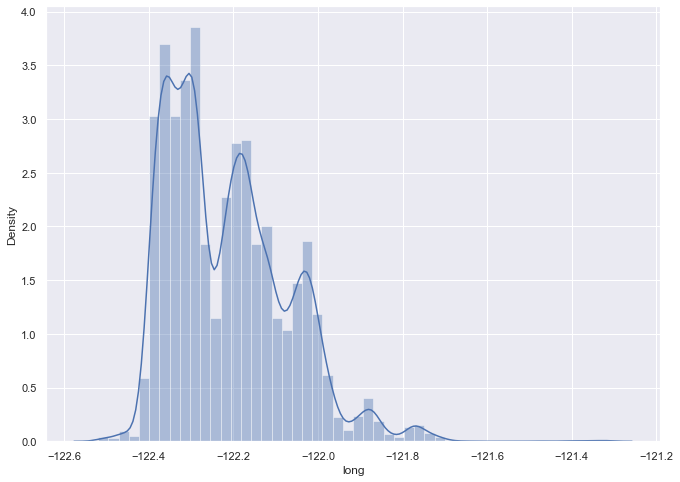

In [140]:
# hist plot to understand the distribtion of longitude.
sns.set(rc={'figure.figsize': (11, 8)})
sns.distplot(housing_df['long'],hist=True, kde=True);

In [141]:
# create_bins function creates clusters of data based on centroids.
# Input Args : 
#   N - number of clusters.
#   var - variable field from dataframe.
#   var_cat - new variable field name to be added in the dataframe.
def create_bins(N,var,var_cat) :
    bins_df = housing_df[[var]].copy()
    bins_df_scaled  = bins_df.apply(zscore)
    bins_df_scaled = pd.DataFrame(bins_df_scaled, columns=bins_df.columns)
    bins_df_scaled.head()

    wcss = []

    for k in range(1,15):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(bins_df_scaled)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(20,8))
    plt.title("WCSS / K Chart", fontsize=18)
    plt.plot(range(1,15),wcss,"-o")
    plt.grid(True)
    plt.xlabel("Amount of Clusters",fontsize=14)
    plt.ylabel("Inertia",fontsize=14)
    plt.xticks(range(1,20))
    plt.tight_layout()
    plt.show()


    kmeans = KMeans(n_clusters=N, n_init = 5, random_state=12345)
    kmeans.fit(bins_df_scaled)
# Check the number of data in each cluster
    labels = kmeans.labels_
    counts = np.bincount(labels[labels>=0])
#   print(counts)


    centroids = kmeans.cluster_centers_
    centroid_df = pd.DataFrame(centroids, columns = list(bins_df_scaled))
    print('centroid values')
    print(centroid_df.transpose())

    predictions = kmeans.predict(bins_df_scaled)
    print(predictions)
    housing_df[var_cat] = predictions
    housing_df[var_cat] = housing_df[var_cat].astype('category')
    print(housing_df.dtypes)

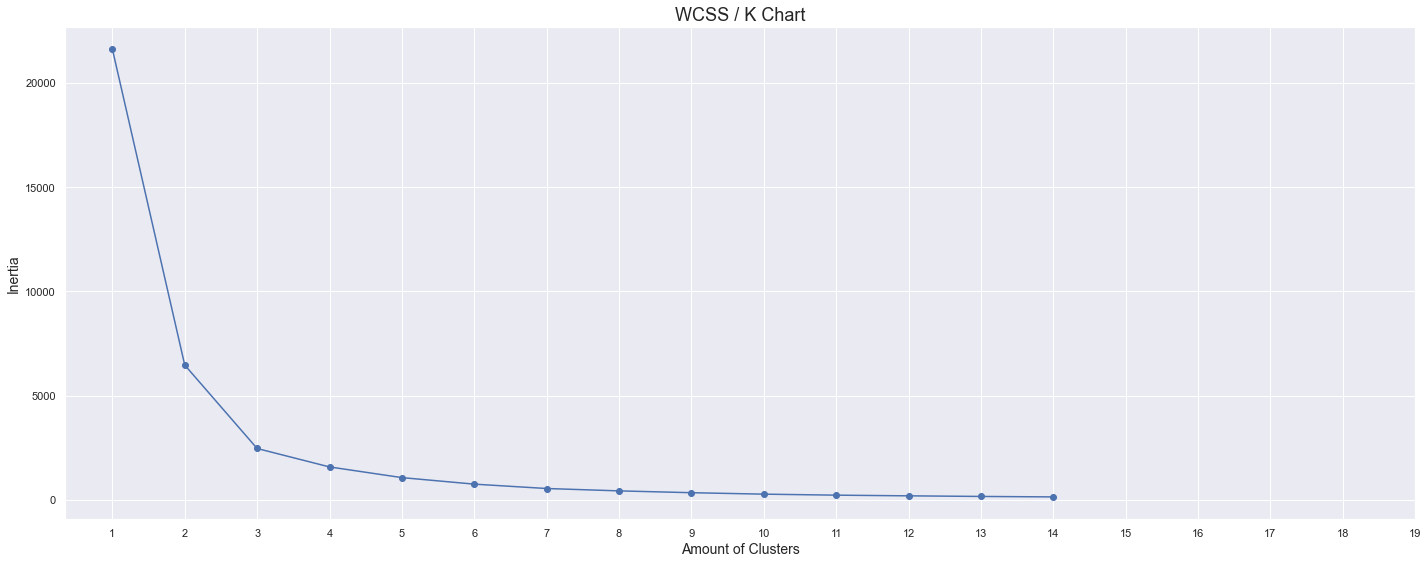

centroid values
        0      1     2      3      4      5
lat 0.682 -1.362 1.231 -1.972 -0.589 -0.002
[2 3 1 ... 4 2 2]
cid                          int64
dayhours            datetime64[ns]
price                        int64
room_bed                     int64
room_bath                  float64
living_measure               int64
lot_measure                  int64
ceil                       float64
coast                        int64
sight                        int64
condition                    int64
quality                      int64
ceil_measure                 int64
basement                     int64
yr_built                     int64
yr_renovated                 int64
zipcode                      int64
lat                        float64
long                       float64
living_measure15             int64
lot_measure15                int64
furnished                    int64
total_area                   int64
yr_sold                      int64
location                  category
dty

In [142]:
create_bins(6,'lat','location')

<AxesSubplot:xlabel='location', ylabel='price'>

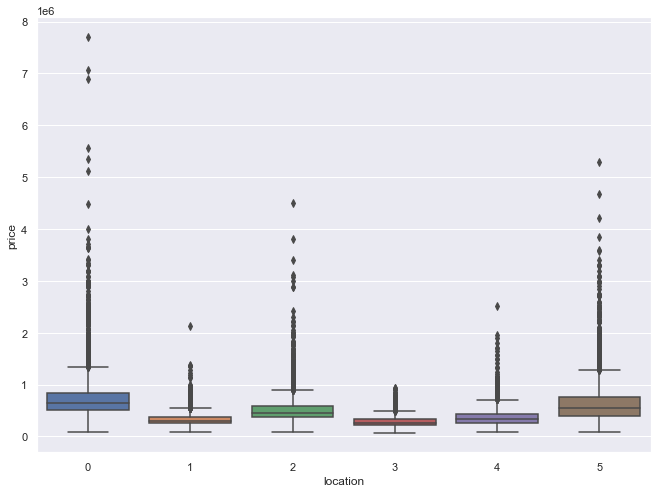

In [143]:
sns.set(rc={'figure.figsize': (11, 8)})
sns.boxplot(housing_df['location'], housing_df['price'])

So as predicted all locations from Mercer Island, United States of America.

Now lets evaluate if we can see any cluster so that we merge both lat & long and create single feature.But once we created cluster we have to evaluate corelation with Price

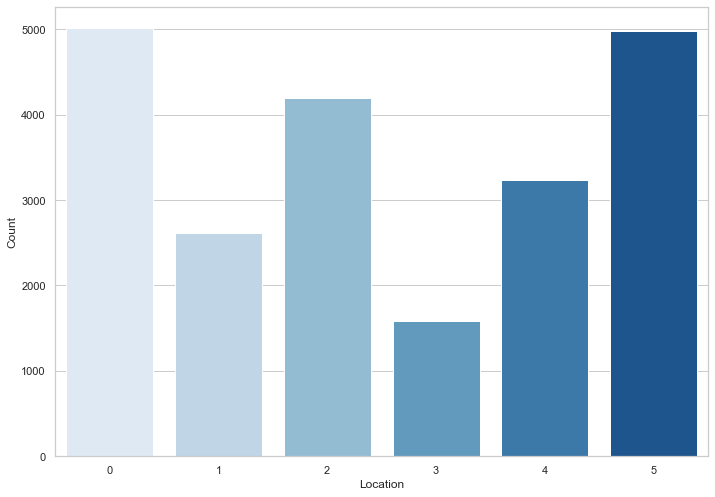

In [144]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.set_style('whitegrid')
ax = sns.countplot(x='location', data=housing_df, palette=sns.color_palette('Blues'))
ax.set(xlabel='Location', ylabel='Count')
plt.show()

In [145]:
housing_df_price = housing_df.groupby('location')['price'].mean()
housing_df_price

location
0   764389.376
1   327766.584
2   512402.469
3   290759.688
4   369256.038
5   639199.670
Name: price, dtype: float64

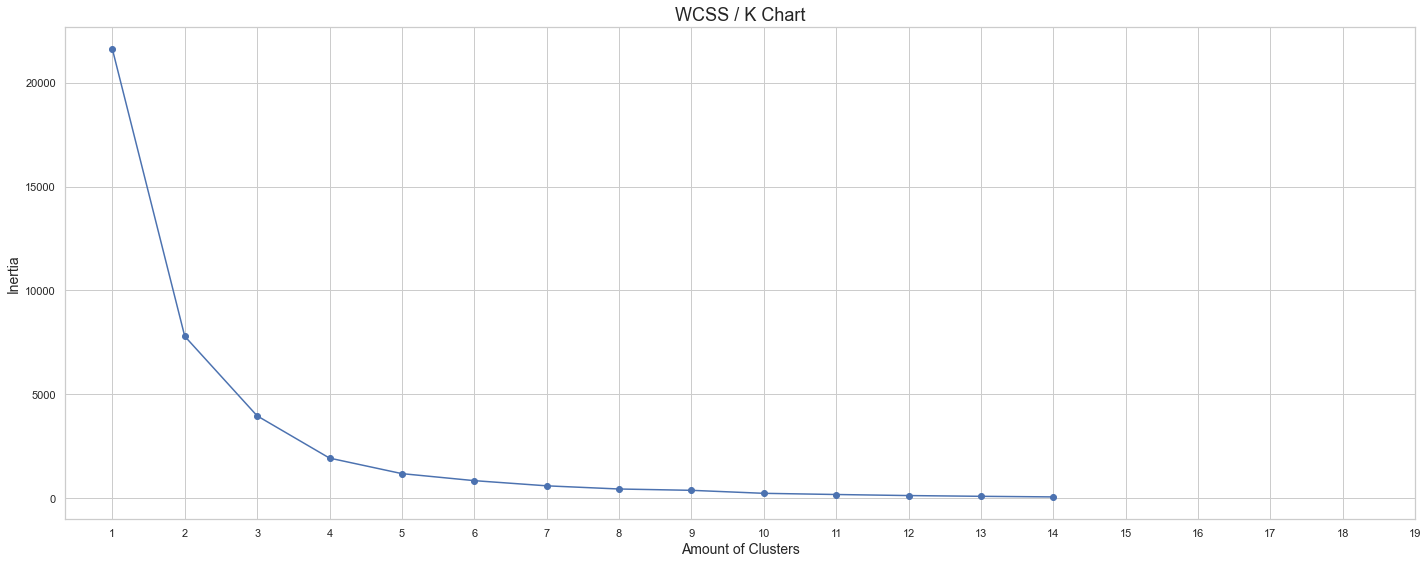

centroid values
               0     1     2      3     4      5
room_bath -1.457 0.468 3.057 -0.149 1.516 -0.578
[4 1 1 ... 1 3 0]
cid                          int64
dayhours            datetime64[ns]
price                        int64
room_bed                     int64
room_bath                  float64
living_measure               int64
lot_measure                  int64
ceil                       float64
coast                        int64
sight                        int64
condition                    int64
quality                      int64
ceil_measure                 int64
basement                     int64
yr_built                     int64
yr_renovated                 int64
zipcode                      int64
lat                        float64
long                       float64
living_measure15             int64
lot_measure15                int64
furnished                    int64
total_area                   int64
yr_sold                      int64
location                  ca

In [146]:
create_bins(6,'room_bath','room_bath_cat')

In [147]:
housing_df.groupby(['room_bath_cat'])['room_bath'].mean()

room_bath_cat
0   0.993
1   2.475
2   4.469
3   2.000
4   3.282
5   1.670
Name: room_bath, dtype: float64

### Let's evaluate yr_built and yr_sold

In [148]:
# adding new column 'age' in the housing dataframe, 'age' tells when the houses were sold.
housing_df['age']=housing_df['yr_sold'].astype(int)-housing_df['yr_built']

So as expected year of built and year of sold is same that's why age for many data values is coming as zero.
We can note down these houses for further analysis as these can be best for buyer as well as seller.

In [149]:
housing_df['age_renovated']=0
housing_df['age_renovated']=housing_df['yr_sold'][housing_df['yr_renovated']!=0].astype(int)-housing_df['yr_renovated'][housing_df['yr_renovated']!=0]
housing_df['age_renovated'][housing_df['age_renovated'].isnull()]=0

In [150]:
# partition the age into bins
bins = [-2,0,5,10,25,50,75,100,500]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
housing_df['age_binned'] = pd.cut(housing_df['age'], bins=bins, labels=labels)
# partition the age_rnv into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['0-1','1-5','6-10','11-25','26-50','51-75','>75']
housing_df['age_renovated_binned'] = pd.cut(housing_df['age_renovated'], bins=bins, labels=labels)

<AxesSubplot:xlabel='age_renovated_binned', ylabel='count'>

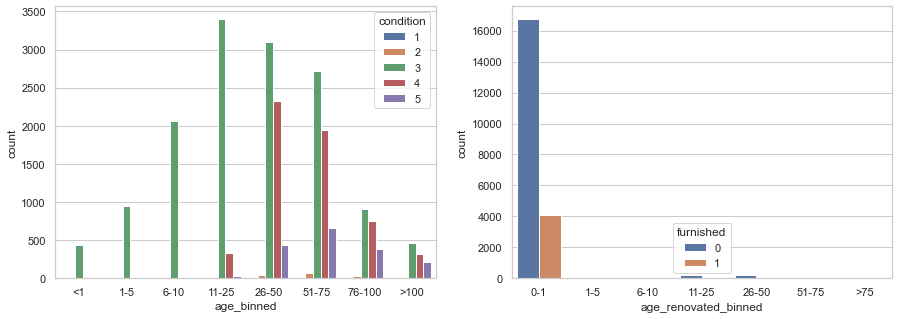

In [151]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(x='age_binned',data=housing_df,ax=axes[0],hue='condition')
sns.countplot(x='age_renovated_binned',data=housing_df,ax=axes[1],hue='furnished')

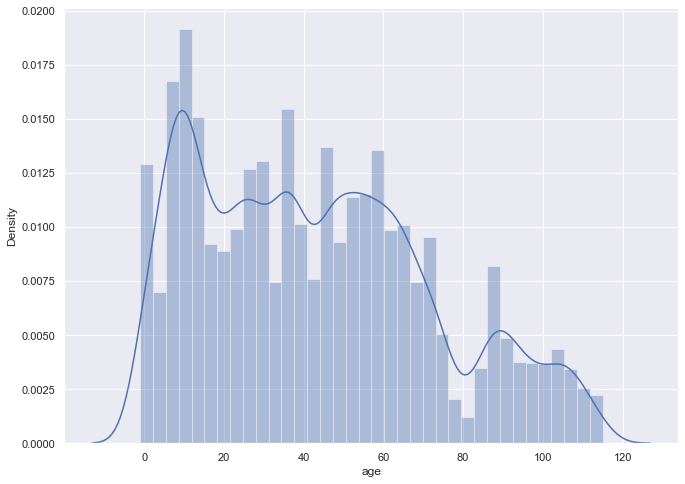

In [152]:
#histogram
sns.set(rc={'figure.figsize': (11, 8)})
sns.distplot(housing_df['age'],hist=True, kde=True);

<AxesSubplot:xlabel='age', ylabel='price'>

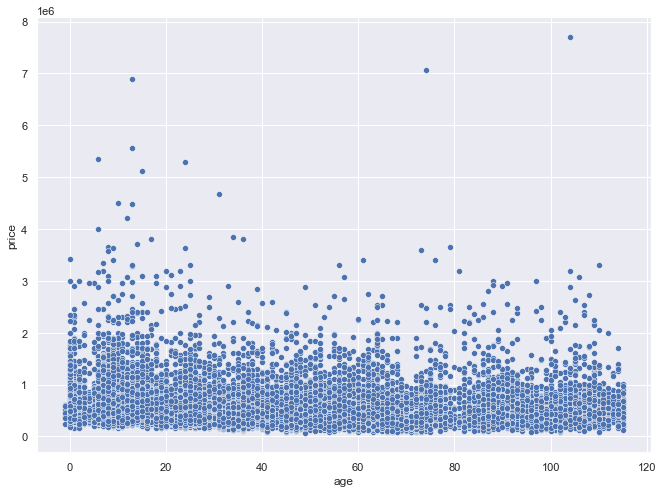

In [153]:
sns.scatterplot(x = housing_df.age, y = housing_df.price, data=housing_df)

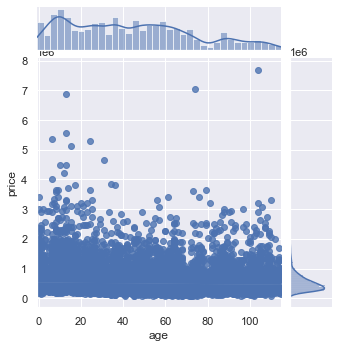

In [154]:
sns.jointplot(x='age', y="price", data=housing_df, kind = 'reg', height = 5)

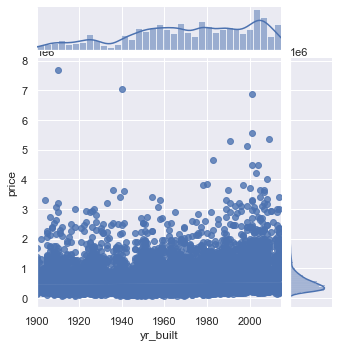

In [155]:
sns.jointplot(x='yr_built', y="price", data=housing_df, kind = 'reg', height = 5)

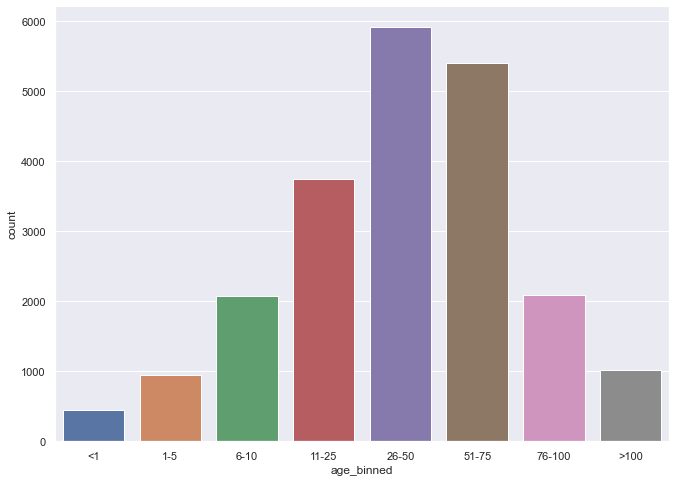

In [156]:
p1=sns.countplot(x='age_binned',data=housing_df)

<AxesSubplot:xlabel='age_binned', ylabel='price'>

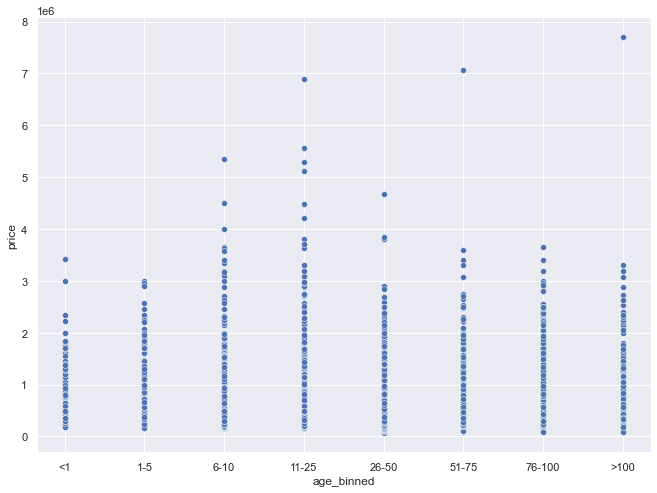

In [157]:
sns.scatterplot(x = housing_df.age_binned, y = housing_df.price, data=housing_df)

### Let's Analyse Condition Attribute

Condition tells how the house is (Overall).When it says overall it may be including all aspects like strength,painting,wiring etc.

So as house buyer this should be one of key feature for selecting any house and its price.Lets evaluate why it is very weak predictor of price.

- With good condition and high grade house price tend to incrases with living measure and ceil measure
- lot measure, living_measure15 does not seems to be very good predictor of house price they does not show any +ve relationship with dependent variable

<AxesSubplot:xlabel='condition', ylabel='price'>

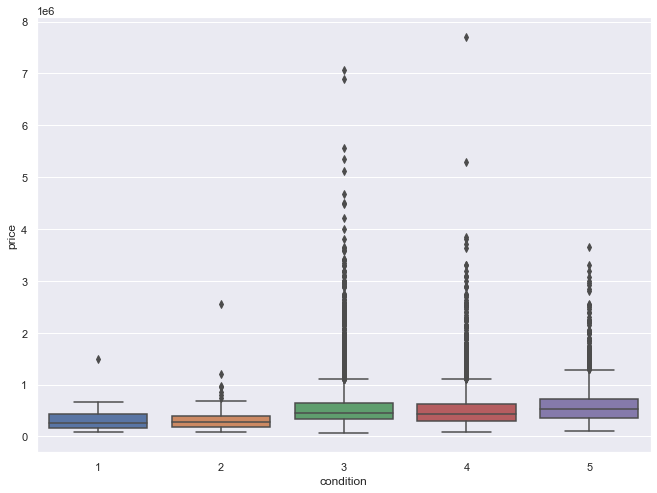

In [158]:
sns.boxplot(x = housing_df.condition, y = housing_df.price, data=housing_df)

<AxesSubplot:xlabel='condition', ylabel='age'>

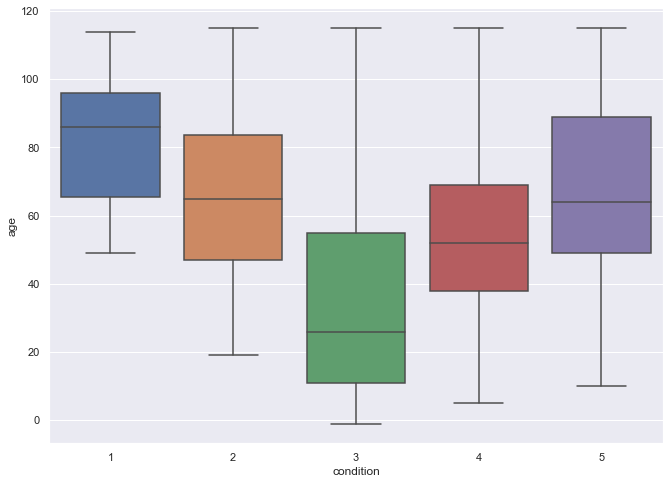

In [159]:
sns.boxplot(x = housing_df.condition, y = housing_df.age, data=housing_df)

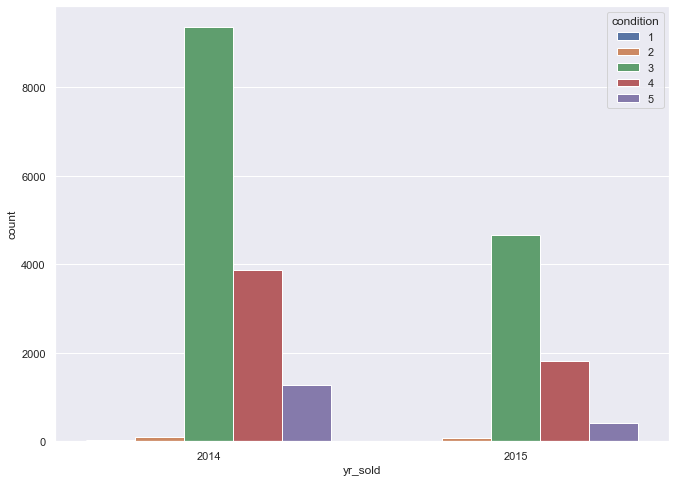

In [160]:
#f, axes = plt.subplots(1, 1,figsize=(15,5))
p1=sns.countplot(x='yr_sold',hue='condition',data=housing_df)

In [161]:
housing_df_copy = housing_df[housing_df['condition'] >= 3]
housing_df_copy['condition'].corr(housing_df_copy['price'])

0.02418863376430135

So as we see data is not balanced.We have more number of values with condition 3 with respect to other condition values.Salesprice is getting reduced with higher condition value.But we can not consider this negative correlation.

For now we will not remove it, will evaluate further.

* area
* outliers

##### Summary after anaysing  variabes - condition, living measure, lot measure, after
- With good condition and high grade house price tend to incrases with living measure and ceil measure
- lot measure, living_measure15 does not seems to be very good predictor of house price they does not show any +ve relationship with dependent variable

## Hypothesis testing
 - Null Hypothesis:there is a no significant linear relationship between an independent variable and a dependent variable<br>
  Ho: Β1 = 0
 - Alternate hyothesis: there is a significant linear relationship between an independent variable and a dependent variable  <br> Ha: Β1 ≠ 0 <br>
 - In short If we find that the slope of the regression line is significantly different from zero, we will conclude that there is a significant relationship between the independent and dependent variables.The null hypothesis states that the slope is equal to zero, and the alternative hypothesis states that the slope is not equal to zero.

## Linear Regression

In [162]:
X = house_df.drop({'price','dayhours','cid','total_area'}, axis=1)
y = house_df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [163]:
LRM = LinearRegression().fit(X_train, y_train)
print('Train Score:',LRM.score(X_train, y_train))
print('Test Score: ',LRM.score(X_test, y_test))
print('Intercept: ',LRM.intercept_)

Train Score: 0.7005482901420459
Test Score:  0.699730454506003
Intercept:  [8912401.7696994]


From above modelling, we see linear regression model is givng less accuracy, so we need to verify whether all linear regression assumption are true.

## Verifying all the assumptions of linear regression 

- High collinerity values shown for living_measure, lot_measure,living_measure15, ceil_measure, basement,lot_measure15
- Even after transforming highly collinear variable we can see accuracy remained same
- Living measure, ceil_meaure,basement, living_measure15, lat,long,zipcode shows very high vif values
- let's try to tranform them using PCA and see if we get any improvement in accuracy

# Let's Jump To final Analysis of Assumptions

According to Hair et al. (2013), four assumptions should be tested:

* <b>Normality</b> - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'price' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

* <b>Homoscedasticity</b> - Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

* <b>Linearity</b> - The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

* <b>Absence of correlated errors(Multicollineraty)</b> - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

# Multicollinearity
-  Living measure, ceil_meaure,basement, living_measure15, lat,long,zipcode shows very high vif values
- let's try to tranform them using PCA and see if we get any improvement in accuracy

In [164]:
num_data = X._get_numeric_data()
pd.Series([variance_inflation_factor(num_data.values, i) 
               for i in range(num_data.shape[1])], 
              index=num_data.columns)

room_bed                23.358
room_bath               28.801
living_measure             inf
lot_measure              2.378
ceil                    16.893
coast                    1.213
sight                    1.553
condition               34.746
quality                210.235
ceil_measure               inf
basement                   inf
yr_built              9650.585
yr_renovated             1.195
zipcode            1633654.771
lat                 139099.329
long               1361454.917
living_measure15        27.247
lot_measure15            2.599
furnished                3.506
dtype: float64

In [165]:
X = house_df.drop({'price','dayhours','cid','total_area','dayhours'}, axis=1)
y = house_df[['price']]

In [166]:
X_colli = X[['living_measure','living_measure15', 'ceil_measure', 'basement','lat','long','zipcode']]
X =  X.drop({'living_measure','living_measure15', 'ceil_measure', 'basement','lat','long','zipcode'},axis=1)

In [167]:
pca = PCA()
X_colli=pca.fit_transform(X_colli)

- Even after performing PCA transformation we can observe that accuracy remains the same

In [168]:
X_colli = pd.DataFrame(X_colli,columns=['living_measure','living_measure15', 'ceil_measure', 'basement','lat','long','zipcode'])
X_con = X.join(X_colli)
X_Pca_train, X_Pca_test, y_Pca_train, y_Pca_test = train_test_split(X_con, y, test_size=0.30 , random_state=1)

In [169]:
LRM = LinearRegression().fit(X_Pca_train, y_Pca_train)
print('Train Score:',LRM.score(X_Pca_train, y_Pca_train))
print('Test Score: ',LRM.score(X_Pca_test, y_Pca_test))
print('Intercept: ',LRM.intercept_)

Train Score: 0.7005482901420459
Test Score:  0.6997304545059781
Intercept:  [4827840.39047449]


## Residual plot
- As we have seen distribution wecan say linear regression would be best model for predicting  price.Butlet’s evaluate using residual plot. If the points in a residual plot arerandomly dispersed around the horizontal axis, a linear regression model isappropriate for the data otherwise a non-linear mode is more appropriate.
- 1. Weseel funnel shaped pattern for living measure and Ceil measure and there is ascope for improvement <br>
- 2. Forrest other variables we don’t see clear patterns and can confidently say thatthese variables are good predictors for Price and best fit for linearregression model.Residual plot for most of thefeatures is randomly dispersed around horizontal axis hence Linear regressionmodel is appropriate for this data 

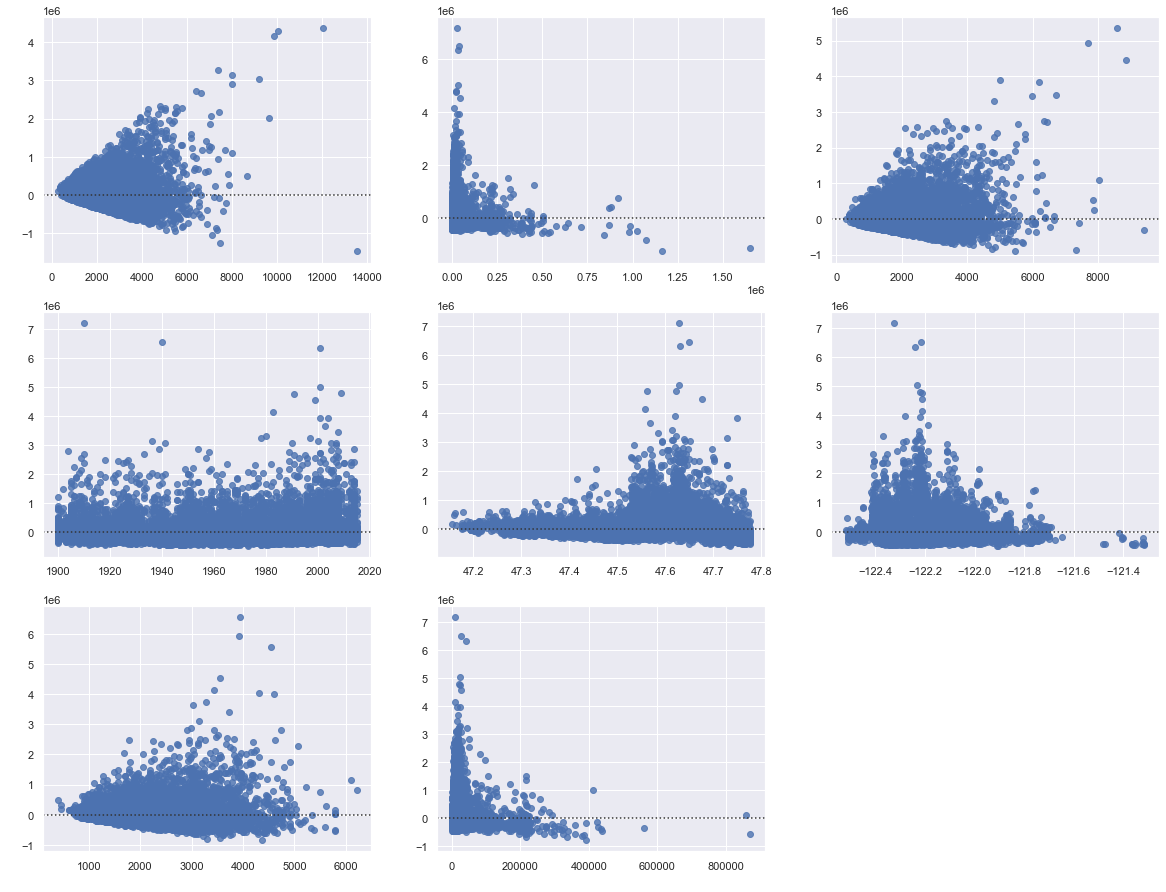

In [171]:
df_residplot_features = ['living_measure','lot_measure','ceil_measure', 'yr_built', 'lat', 'long', 'living_measure15', 'lot_measure15']
plt.figure(figsize=(20,37))
gs = gridspec.GridSpec(7,3)
for i, cn in enumerate(housing_df[df_residplot_features]):
    ax = plt.subplot(gs[i])
    sns.residplot(housing_df[cn],housing_df['price'],ax=ax)
#     ax.set_title(str(cn)[0:])
    ax.set_ylabel(' ')
    ax.set_xlabel(' ')

#### Normality Analysis

The point here is to test 'price' in a very lean way. We'll do this by paying attention to:

* <b>Histogram</b> - Kurtosis and skewness.
* <b>Normal probability plot</b> - Data distribution should closely follow the diagonal that represents the normal distribution.

TypeError: 'DataFrame' object is not callable

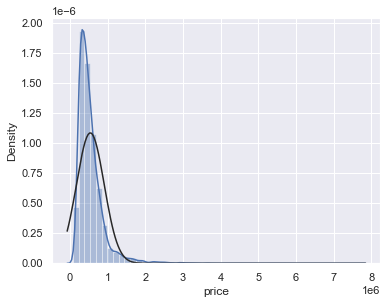

In [172]:
# plotting histogram to check the normal distribution for 'price','living_measure','lot_measure','ceil_measure', 'yr_built', 
#'zipcode','lat', 'long', 'living_measure15', 'lot_measure15' fields

df_features = ['price','living_measure','lot_measure','ceil_measure', 'yr_built', 'zipcode','lat', 'long', 'living_measure15', 'lot_measure15']

plt.figure(figsize=(20,37))
gs = gridspec.GridSpec(7,3)
for i, cn in enumerate(housing_df[df_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(housing_df[cn], fit=norm)
    ax.set_title(str(cn)[0:])
    ax.set_ylabel(' ')
    ax.set_xlabel(' ')

In [ ]:
# using probplot to find the best fit line for
#'price','living_measure','lot_measure','ceil_measure', 'yr_built', 'zipcode','lat', 'long', 'living_measure15', 
# 'lot_measure15' fields

plt.figure(figsize=(20,37))
gs = gridspec.GridSpec(7,3)
for i, cn in enumerate(housing_df[df_features]):
    ax = plt.subplot(gs[i])
    stats.probplot(housing_df[cn], plot=plt)
    ax.set_title(str(cn)[0:])

In [173]:
#Skip the log transformation as of now

In [174]:
# We are not normalising lat and long because it is coordinates.We can convert lat & long to x,y & z and then normalize it.
#x = cos(lat) * cos(lon)
#y = cos(lat) * sin(lon), 
#z = sin(lat)

housing_df['price'] = np.log(housing_df['price'])
housing_df['living_measure'] = np.log(housing_df['living_measure'])
housing_df['lot_measure'] = np.log(housing_df['lot_measure'])
housing_df['ceil_measure'] = np.log(housing_df['ceil_measure'])
housing_df['living_measure15'] = np.log(housing_df['living_measure15'])
housing_df['lot_measure15'] = np.log(housing_df['lot_measure15'])

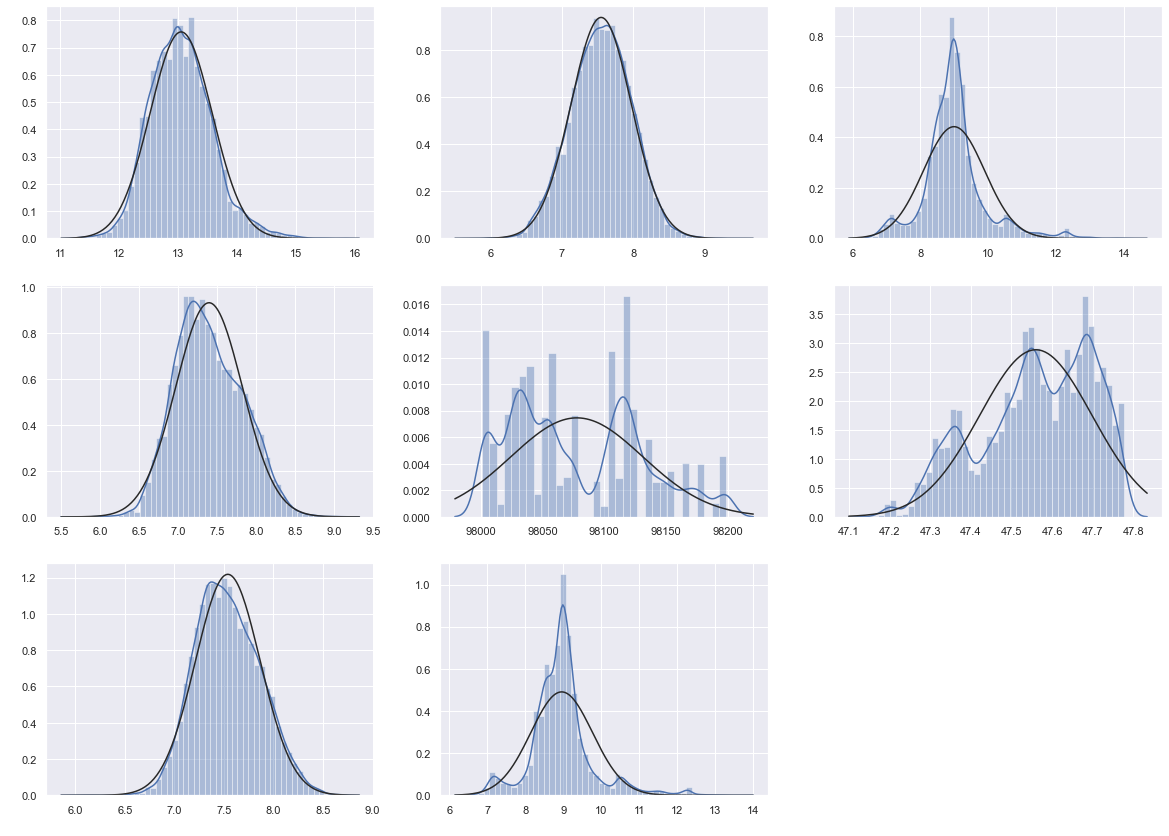

In [176]:
# plotting histogram after log transformation to check the distribution
log_features =['price','living_measure','lot_measure','ceil_measure', 'zipcode','lat', 'living_measure15', 'lot_measure15']

plt.figure(figsize=(20,35))
gs = gridspec.GridSpec(7,3)
for i, cn in enumerate(housing_df[log_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(housing_df[cn], fit= norm)
#     ax.set_title(str(cn)[0:])
    ax.set_ylabel(' ')
    ax.set_xlabel(' ')

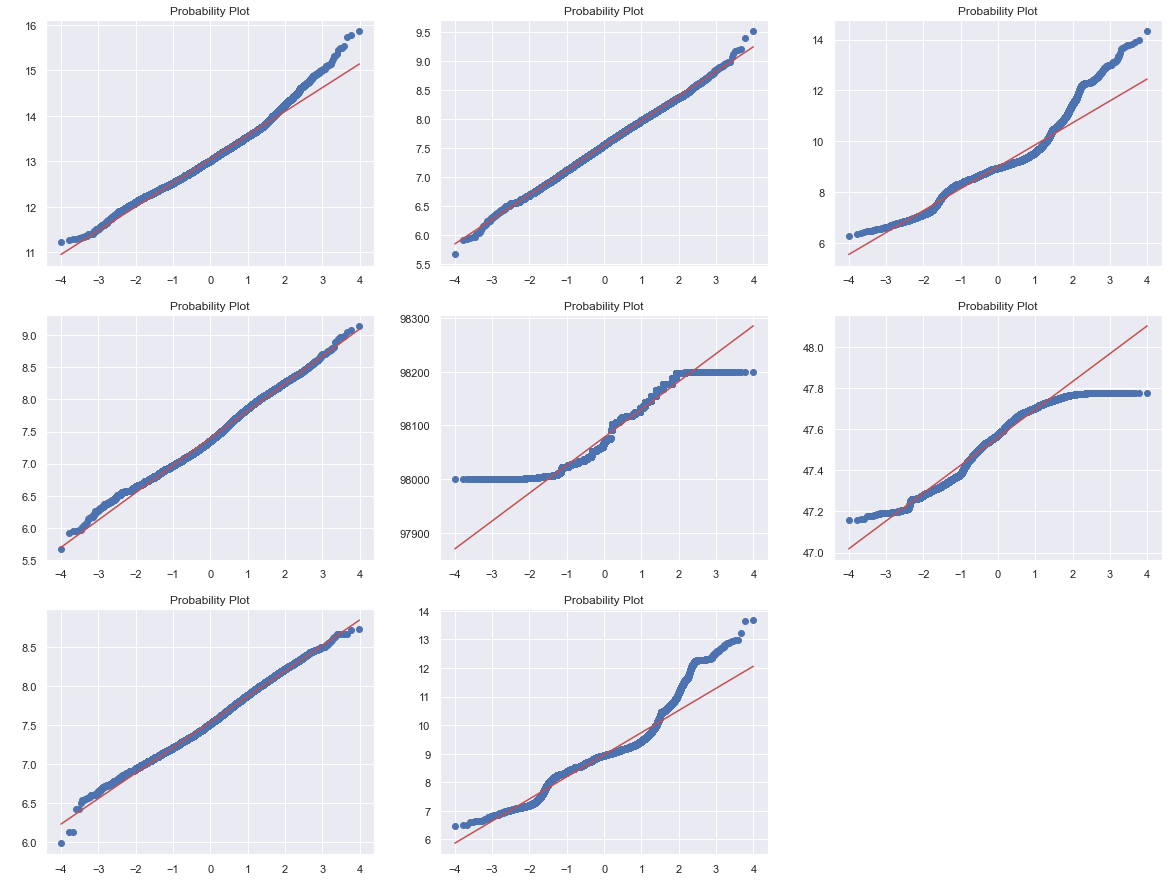

In [178]:
plt.figure(figsize=(20,37))
gs = gridspec.GridSpec(7,3)
for i, cn in enumerate(housing_df[log_features]):
    ax = plt.subplot(gs[i])
    stats.probplot(housing_df[cn], plot=plt)
#     ax.set_title(str(cn)[0:])
    ax.set_ylabel(' ')
    ax.set_xlabel(' ')

## homoscedasticity
The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

In [179]:
housing_df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'yr_sold', 'location', 'room_bath_cat', 'age',
       'age_renovated', 'age_binned', 'age_renovated_binned'],
      dtype='object')

In [180]:
# Copying from below point to replace with label encoder for the categorical columns, move to bottom

In [181]:
housing_df_model = housing_df.drop({'dayhours','cid','total_area','zipcode'}, axis=1)
##housing_df_model = pd.get_dummies(housing_df_model, columns = ['location','ceil', 'coast', 'sight', 'quality','furnished','condition','room_bath_cat','age_binned','age_renovated_binned'])
print( housing_df_model.columns)

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'yr_sold', 'location',
       'room_bath_cat', 'age', 'age_renovated', 'age_binned',
       'age_renovated_binned'],
      dtype='object')


# Let's frop below columns becaus we have derived new columns from same column. So it is better to drop them instead of keeping same variables in the model building

In [182]:
housing_df_model= housing_df_model.drop({'age','age_renovated','lat','long','room_bath','yr_sold'},axis=1)
housing_df_model_later = housing_df_model.copy
housing_df_model = pd.get_dummies(housing_df_model, columns = ['location','ceil', 'coast', 'sight', 'quality','furnished','condition','room_bath_cat','age_binned','age_renovated_binned'])
print( housing_df_model.columns)

Index(['price', 'room_bed', 'living_measure', 'lot_measure', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'living_measure15',
       'lot_measure15', 'location_0', 'location_1', 'location_2', 'location_3',
       'location_4', 'location_5', 'ceil_1.0', 'ceil_1.5', 'ceil_2.0',
       'ceil_2.5', 'ceil_3.0', 'ceil_3.5', 'coast_0', 'coast_1', 'sight_0',
       'sight_1', 'sight_2', 'sight_3', 'sight_4', 'quality_1', 'quality_3',
       'quality_4', 'quality_5', 'quality_6', 'quality_7', 'quality_8',
       'quality_9', 'quality_10', 'quality_11', 'quality_12', 'quality_13',
       'furnished_0', 'furnished_1', 'condition_1', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'room_bath_cat_0',
       'room_bath_cat_1', 'room_bath_cat_2', 'room_bath_cat_3',
       'room_bath_cat_4', 'room_bath_cat_5', 'age_binned_<1', 'age_binned_1-5',
       'age_binned_6-10', 'age_binned_11-25', 'age_binned_26-50',
       'age_binned_51-75', 'age_binned_76-100', 'age_bin

- After doing the log tranformation we can see that model accuracy has been increased by 8%

In [183]:
X_reg = housing_df_model.drop({'price'}, axis=1)
y_reg = housing_df_model[['price']]
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.30 , random_state=1)
regression_model = LinearRegression()
rm = regression_model.fit(X_train, y_train)

print(X_train.shape)
print(X_test.shape)

print('Train Score')
print('  ')
print(rm.score(X_train, y_train))
print('-----------')
print('Test Score')
print('  ')
print(rm.score(X_test, y_test))

(15129, 68)
(6484, 68)
Train Score
  
0.8420699743000623
-----------
Test Score
  
0.8401348329870525


# Using Statsmodel library to get R type outputs 
- since we got a good score from the LM model, so we can generate the report from the OLS summary and account in for further Multicollinearity and Homoscedasticity

In [184]:
X = housing_df_model.iloc[:,1:].values
y = housing_df_model.iloc[:,0].values

In [185]:
X = sm.add_constant(X)

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [187]:
model = sm.OLS(endog=y_train,exog=X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1410.
Date:                Mon, 01 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:31:41   Log-Likelihood:                 2141.8
No. Observations:               15129   AIC:                            -4168.
Df Residuals:                   15071   BIC:                            -3725.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5781      0.188     19.079      0.0

In [188]:
# coefficient of each Independent variable

In [189]:
for idx, col_name in enumerate(housing_df_model.columns[0:]):
    if idx==0:
        print("The coefficient for {} is {}".format("Intercept", results.params[idx]))
    else:    
        print("The coefficient for {} is {}".format(col_name, results.params[idx]))

The coefficient for Intercept is 3.578082722883636
The coefficient for room_bed is -0.015161528496842151
The coefficient for living_measure is 0.22198142521325753
The coefficient for lot_measure is 0.06015626614241501
The coefficient for ceil_measure is 0.16649153748369502
The coefficient for basement is 4.6497944822631074e-05
The coefficient for yr_built is -0.001341107810621656
The coefficient for yr_renovated is 4.8401611763721034e-05
The coefficient for living_measure15 is 0.16878909419278634
The coefficient for lot_measure15 is -0.024646059438420673
The coefficient for location_0 is 1.0106029333529825
The coefficient for location_1 is 0.3275842163105861
The coefficient for location_2 is 0.7404035594021803
The coefficient for location_3 is 0.24256738472592732
The coefficient for location_4 is 0.45688074854698535
The coefficient for location_5 is 0.8000438805446337
The coefficient for ceil_1.0 is 0.600095275593551
The coefficient for ceil_1.5 is 0.5931578968705308
The coefficient fo

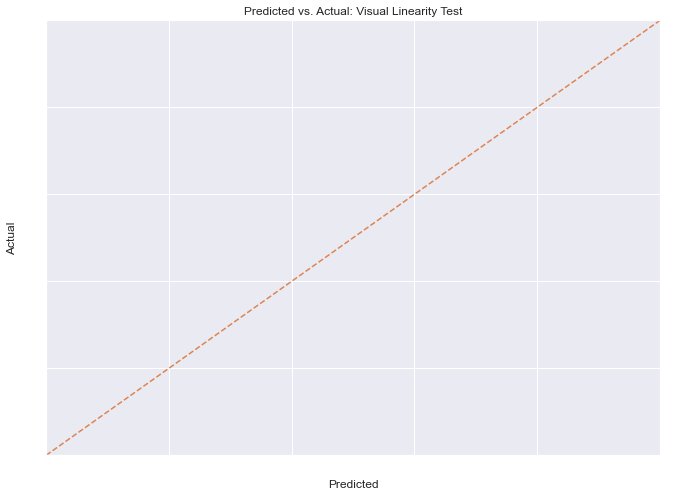

In [190]:
def abline(slope, intercept):
    gca = plt.gca()
    gca.set_autoscale_on(False)
    x_vals = np.array(gca.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
#fit an OLS model to data
model = sm.OLS(y_train,X_train)
results = model.fit()
#predict y values for training data
y_hat = model.predict(results.params)
#plot predicted vs actual
plt.plot(y_hat,y_train,'o')
plt.xlabel("Predicted")#,color='white')
plt.ylabel("Actual")#,color='white')
plt.title('Predicted vs. Actual: Visual Linearity Test')#,color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

abline(1,0)
plt.show()

In [191]:
results.pvalues.max()

0.8205638330149138

### Accuracy range with 95% Confidence interval for  Linear regression

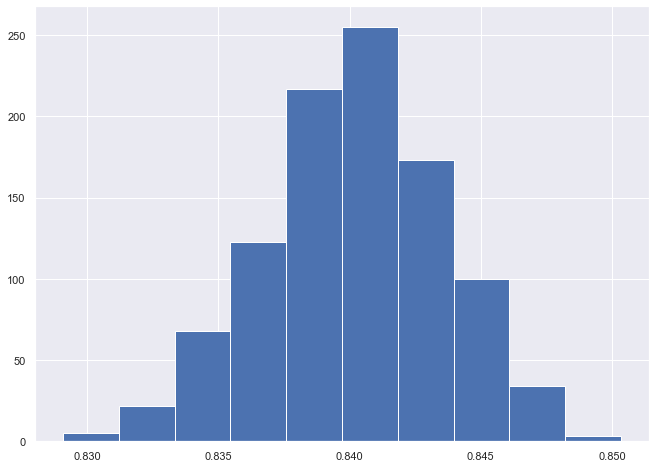

95.0 confidence interval 83.3% and 84.7%


In [192]:
# configure bootstrap
n_iterations = 1000
#n_size = int(len(X) * 0.50)
#values = housing_df_model.values
regression_model = LinearRegression()
# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.30 , random_state=i)
    	# fit model
    rm = regression_model.fit(X_train, y_train)
	# evaluate model
    score = rm.score(X_test, y_test)
    #print(score)
    stats.append(score)
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

### Linear regression model was quickest to train and I could use around 1000 samples to establish the interval.
### with 95% confidence interval we can say out Linear Regression Model will perform with accuracy range between 83.3 to 84.7.

# Linear Regression - Price Predictions

### The coefficient for living_measure is 0.2190681531395575 , lets check the increase/Decrease in the value of House price by keeping all other values same .
### Expected increase is by 22% 

In [195]:
sample_2 = X_test.head(1)
# print('an example where living measure is =' + str(sample_2['living_measure'].values))
print('pedicted house value is ')
print(np.exp(rm.predict(sample_2)))
value1 = np.exp(rm.predict(sample_2))
print('--------------------------------')

sample_2['living_measure'] = sample_2['living_measure'] + 1
# print('have changed living measure for the same example and value of living measure is =' + str(sample_2['living_measure'].values))
print('pedicted house value this time is ')
print(np.exp(rm.predict(sample_2)))
value2 = np.exp(rm.predict(sample_2))

pedicted house value is 
[[876705.04932407]]
--------------------------------
pedicted house value this time is 
[[1108741.70757339]]


In [196]:
print('percent increase in house price when living measure in increased by a unit ' )
print(((value2-value1)/value1)*100)

percent increase in house price when living measure in increased by a unit 
[[26.46690109]]


# Non Parametric Model development
- Apart from Linear Regression we will tryother regression algorithm and see which one gives better accuracy
- we will finalize the 2 model depending on the accuracy

In [197]:
# Drop the not required variable
house_df_model=house_df.drop(['cid','dayhours','total_area'],axis=1)

In [198]:
# Let's first normalize the data
house_df_model_z = house_df_model.apply(zscore)

In [199]:
X = house_df_model_z.drop('price',axis=1)
y = house_df_model_z[['price']]
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3,random_state=101)

In [202]:
Model = []
RMSE = []
R_sq = []
cv = KFold(10, random_state = None)

def model_score(name,model,x,y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [203]:
names = ['K Neighbors Regressor','Support Vector Regressor(rbf)','Support Vector Regressor(linear)',
         'Support Vector Regressor(poly)','Decision Tree Regressor','Random Forest Regressor']

models = [KNeighborsRegressor(),
          SVR(kernel='rbf'),SVR(kernel='linear'),SVR(kernel='poly'),
         DecisionTreeRegressor(random_state=3),RandomForestRegressor(random_state=3)]

In [204]:
for name, model in zip(names,models):
    model_score(name,model,X_train,y_train)

In [205]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print(evaluation)
evaluation.sort_values(by='R Squared', ascending=False,inplace=True)

                              Model  RMSE  R Squared
0             K Neighbors Regressor 0.469      0.783
1     Support Vector Regressor(rbf) 0.485      0.772
2  Support Vector Regressor(linear) 0.587      0.659
3    Support Vector Regressor(poly) 0.650      0.577
4           Decision Tree Regressor 0.516      0.735
5           Random Forest Regressor 0.362      0.871


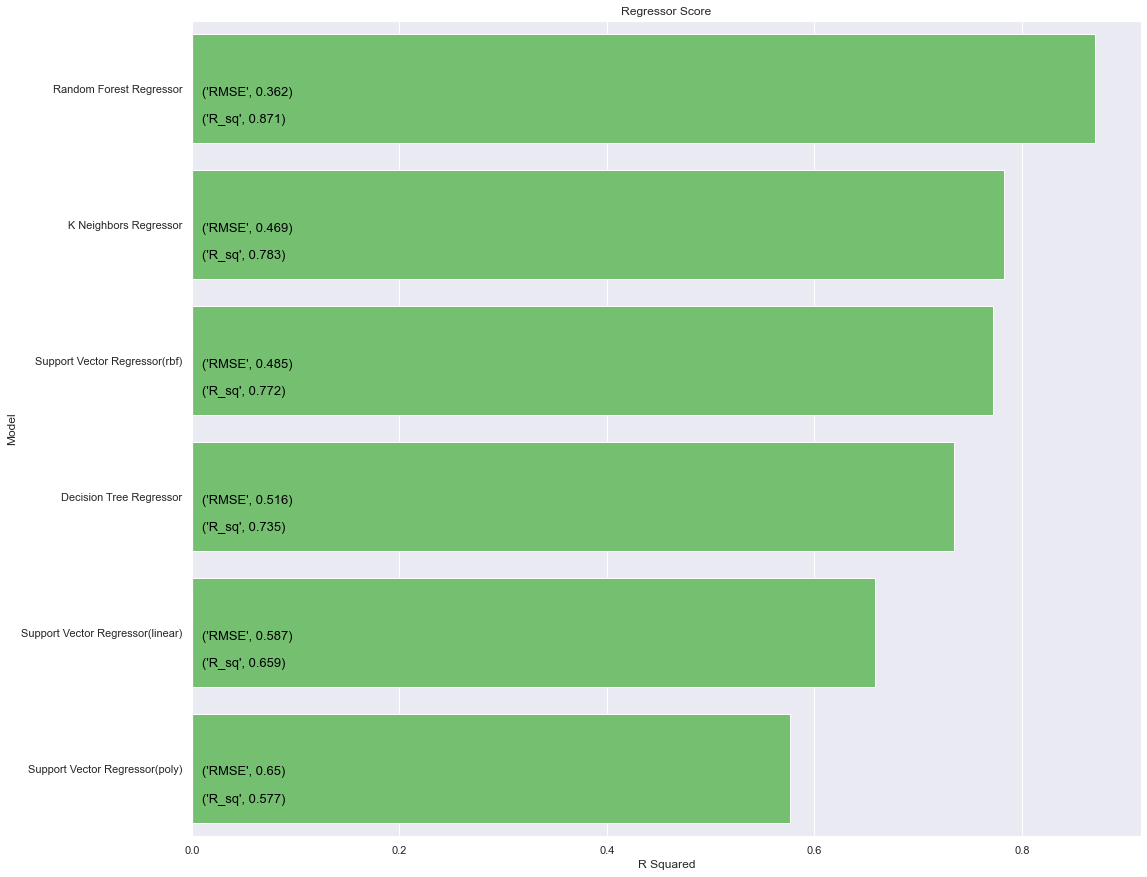

In [206]:
f, ax = plt.subplots(figsize=(17, 15)) 
plt.xlabel('Score')
plt.title('Regressor Score')
sns.set_color_codes("muted")
sns.barplot(x='R Squared', y='Model', data=evaluation, color="g")
for i, v in enumerate(evaluation['RMSE'].round(3)): 
    ax.text(0.01, i+0.05, ("RMSE",v),fontsize=13,color='Black',weight='light')
for i, v in enumerate(evaluation['R Squared'].round(3)): 
    ax.text(0.01, i+0.25, ("R_sq",v),fontsize=13,color='Black',weight='light')
plt.show()

### As we have seen above RandomForest Regressor performed well,we will choose this model for further analysis.

### Lets Analyse Other Non parameteric Ensemble Algorithm.

In [207]:
MSE_Score = []
Performance_Test = []
Alg = []

### Gradient Boosting

In [208]:
gbrg = GradientBoostingRegressor(random_state=3)
gbrg = gbrg.fit(X_train, y_train)

print('Train Score: ',gbrg.score(X_train, y_train))
print('-'*40)
print('Test Score:',gbrg.score(X_test, y_test))
y_pred = gbrg.predict(X_test)
print('-'*40)

Alg.append('Gradient boosting')
MSE_Score.append(gbrg.score(X_test, y_test))
Performance_Test.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Train Score:  0.901805962145821
----------------------------------------
Test Score: 0.8825253460211743
----------------------------------------
MAE: 0.20368507701357494
MSE: 0.11527542920546452
RMSE: 0.3395223545003547


### XGBoostRegressor

In [209]:
modelxgb = XGBRegressor()
modelxgb.fit(X_train, y_train, eval_metric='rmse',early_stopping_rounds=50, eval_set=[(X_test, y_test)], verbose=False)
print('Train Score :',modelxgb.score(X_train, y_train))
print('-'*40)
print('Test Score:',modelxgb.score(X_test, y_test))
y_pred = modelxgb.predict(X_test)
print('-'*40)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Alg.append('XGBoost')
MSE_Score.append(modelxgb.score(X_test, y_test))
Performance_Test.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Train Score : 0.9765880630633385
----------------------------------------
Test Score: 0.8961264408468985
----------------------------------------
MAE: 0.18435266475799
MSE: 0.10192895836604261
RMSE: 0.3192631490887143


### AdaBoost

In [210]:
adb_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12),random_state=3)
adb_model.fit(X_train, y_train)
print('Train Score:',adb_model.score(X_train, y_train))
print('-'*40)
print('Test Score: ',adb_model.score(X_test, y_test))
y_pred = adb_model.predict(X_test)
print('-'*40)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
Alg.append('ADABoost')
MSE_Score.append(adb_model.score(X_test, y_test))
Performance_Test.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Train Score: 0.9827778569576954
----------------------------------------
Test Score:  0.8850289346761019
----------------------------------------
MAE: 0.19092941410766412
MSE: 0.11281870984536557
RMSE: 0.33588496519696376


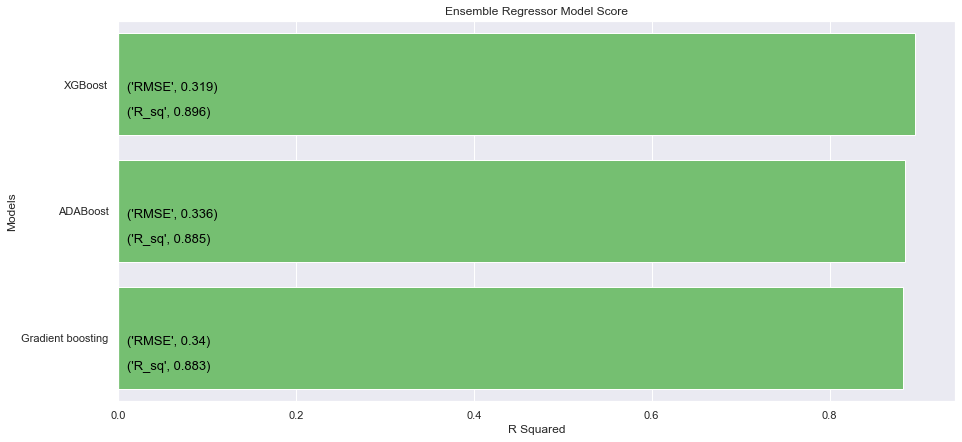

In [211]:
Ensemble_model_df = pd.DataFrame({"Models":Alg, "R Squared":MSE_Score,"RMSE":Performance_Test})
Ensemble_model_df.sort_values(by='R Squared', ascending=False,inplace=True)
f, ax = plt.subplots(figsize=(15, 7)) 
plt.xlabel('Score')
plt.title('Ensemble Regressor Model Score')
sns.set_color_codes("muted")
g = sns.barplot("R Squared","Models",data = Ensemble_model_df,color="g")
for i, v in enumerate(Ensemble_model_df['RMSE'].round(3)): 
    ax.text(0.01, i+0.05, ("RMSE",v),fontsize=13,color='Black',weight='light')
for i, v in enumerate(Ensemble_model_df['R Squared'].round(3)): 
    ax.text(0.01, i+0.25, ("R_sq",v),fontsize=13,color='Black',weight='light')
plt.show()

### From above we can see all three algorithms nearly performs same.So we will choose AdaBoostRegressor and Random Forest further analysis

### Let's analyse AdaBoostRegressor and Random Forest on Featured Engineered data set .

In [212]:
# Continuing after homoscedasticity and label encoding 
from sklearn.preprocessing import LabelEncoder

from sklearn import preprocessing 

le = preprocessing.LabelEncoder()

housing_df_model = housing_df_model_later

housing_df_model = housing_df.drop({'dayhours','cid','total_area','zipcode'}, axis=1)

In [213]:
le.fit(housing_df_model['age_binned'])
housing_df_model['age_binned']=le.transform(housing_df_model['age_binned'])
le.fit(housing_df_model['age_renovated_binned'])
housing_df_model['age_renovated_binned']=le.transform(housing_df_model['age_renovated_binned'])

In [214]:
print( housing_df_model.columns)

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'yr_sold', 'location',
       'room_bath_cat', 'age', 'age_renovated', 'age_binned',
       'age_renovated_binned'],
      dtype='object')


In [215]:
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, accuracy_score
MSE_Score = []
Performance_Test = []
Alg = []

X = housing_df_model.drop({'price'}, axis=1)
y = housing_df_model[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [216]:
rnd_model = RandomForestRegressor(random_state=3)
rnd_model = rnd_model.fit(X_train, y_train)

print('Train Score: ',rnd_model.score(X_train, y_train))
print('-'*40)
print('Test Score:',rnd_model.score(X_test, y_test))
y_pred = rnd_model.predict(X_test)
print('-'*40)

Alg.append('Gradient boosting')
MSE_Score.append(rnd_model.score(X_test, y_test))
Performance_Test.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Train Score:  0.9835324643711266
----------------------------------------
Test Score: 0.8891083155811911
----------------------------------------
MAE: 0.12267374473428876
MSE: 0.03031271832026079
RMSE: 0.17410548044292226


In [217]:
adb_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12),random_state=3)
adb_model.fit(X_train, y_train)
print('Train Score:',adb_model.score(X_train, y_train))
print('-'*40)
print('Test Score: ',adb_model.score(X_test, y_test))
y_pred = adb_model.predict(X_test)
print('-'*40)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
Alg.append('ADABoost')
MSE_Score.append(adb_model.score(X_test, y_test))
Performance_Test.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Train Score: 0.9647809965766607
----------------------------------------
Test Score:  0.8905277384067142
----------------------------------------
MAE: 0.12564544817626744
MSE: 0.029924712993144177
RMSE: 0.17298760936305288


### We can see that model performed well on feature engineered data,so we will continue our hyper tunning model on this data set

## Hyperparameter Tunning:
- Hyperparameters can be thought of as model settings. These settings need to be tuned for each problem because the best model hyperparameters for one particular dataset will not be the best across all datasets. The process of hyperparameter tuning (also called hyperparameter optimization) means finding the combination of hyperparameter values for a machine learning model that performs the best - as measured on a validation dataset - for a problem.
- There are several approaches to hyperparameter tuning

 1. Manual: select hyperparameters based on intuition/experience/guessing, train the model with the hyperparameters, and score on the validation data. Repeat process until you run out of patience or are satisfied with the results.
 2. Grid Search: set up a grid of hyperparameter values and for each combination, train a model and score on the validation data. In this approach, every single combination of hyperparameters values is tried which can be very inefficient!
 3. Random search: set up a grid of hyperparameter values and select random combinations to train the model and score. The number of search iterations is set based on time/resources.
 4. Automated Hyperparameter Tuning: use methods such as gradient descent, Bayesian Optimization, or evolutionary algorithms to conduct a guided search for the best hyperparameters.

### Will start with first level of hyper tunning on XGBRegressor and Random Forest

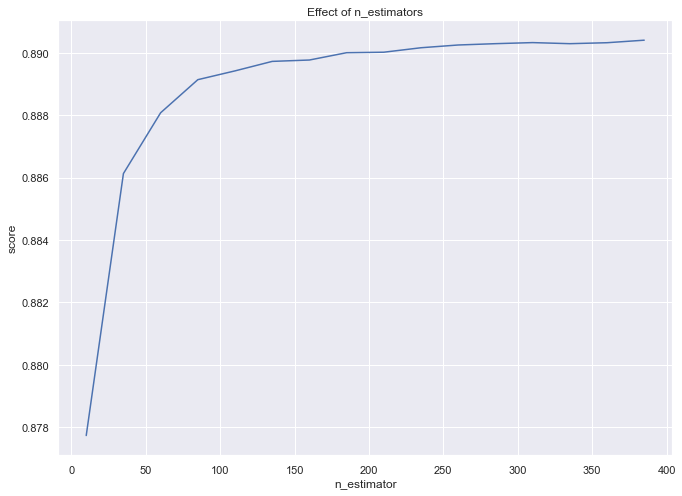

In [218]:
#Random Forest Regressor

rf_model = RandomForestRegressor(n_jobs=-1,random_state=3)

# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 400, 25)
scores = []
for n in estimators:
    rf_model.set_params(n_estimators=n)
    rf_model.fit(X_train, y_train)
    scores.append(rf_model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [219]:
param_grid = [
      {'n_estimators': [135,185,210], 'max_features': [15,10]},
      {'bootstrap': [True]},
             ]
forest_reg = RandomForestRegressor(random_state=1)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)
rnd_reg_best = grid_search.best_estimator_

Train Score
  
0.9842257177191075
Test Score
  
0.8935916550267657
MAE: 0.12050752127700606
MSE: 0.029087178222641268
RMSE: 0.1705496356567239


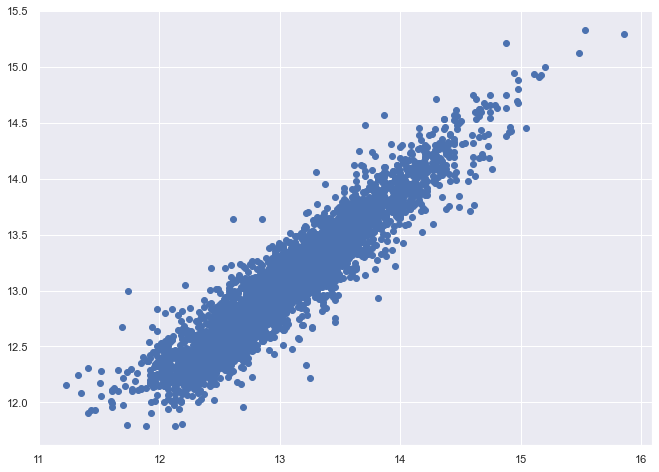

In [220]:
print('Train Score')
print('  ')
print(rnd_reg_best.score(X_train, y_train))

print('Test Score')
print('  ')
print(rnd_reg_best.score(X_test, y_test))

y_pred = rnd_reg_best.predict(X_test)
plt.scatter(y_test['price'], y_pred)

Alg.append('Random Forest')
MSE_Score.append(metrics.mean_squared_error(y_test, y_pred))
Performance_Test.append(rnd_reg_best.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [221]:
adb_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12), learning_rate=0.01, loss='linear',
        n_estimators=1200, random_state=1920)
adb_model.fit(X_train, y_train)
print('Train Score:',adb_model.score(X_train, y_train))
print('-'*40)
print('Test Score: ',adb_model.score(X_test, y_ test))
y_pred = adb_model.predict(X_test)
print('-'*40)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
Alg.append('ADABoost')
MSE_Score.append(adb_model.score(X_test, y_test))
Performance_Test.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Train Score: 0.9715417240416238
----------------------------------------
Test Score:  0.8912744381074467
----------------------------------------
MAE: 0.12310037909019962
MSE: 0.029720599422169435
RMSE: 0.1723966340221567


## Choosing non-parametric algorithm


### Random forest algorithm did equally well when compared to boosting algorithms R2 score near 0.90 is really good improvement

1. From Non-Parametric set of algorithms we will go with the Random forest as it is easier to explain than other ensemble techniques we used like Gradient boosting , XGBoost and AdaBoost. 
1. We really cant explain and convince someone intuitively what really goes under the hood for Gradient boosting,Xgboost and Adaboost.
1. By using Feature importance technique with random forest we can bring machine learning explainability to our final model with which feaures are playing major role in predicting the House Price.

### Will start with second level of hyper tunning on Random Forest using RandomSearch and GridSearch

In [222]:
def gridsearch_hyperparam_tunning(model_name,reg_model,param_grid):
    model = reg_model
    ran_model = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose=2, n_jobs = -1,scoring='neg_mean_squared_error', return_train_score=True)
    # Fit the random search model
    ran_model.fit(X_train,y_train.values.ravel())
    print(ran_model.best_params_)
    y_hat = ran_model.predict(X_test)
    print( model_name + " Prediction R2-score: {}".format(round(r2_score(y_hat, y_test),4)))
    print(model_name + ' Prediction RMSE:', np.sqrt(mean_squared_error(y_hat,y_test)))
    
    return ran_model.best_estimator_

In [223]:
def randomised_hyperparam_tunning(model_name,reg_model,param_grid,n_iter_p):
    model = reg_model
    ran_model = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = n_iter_p, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    ran_model.fit(X_train,y_train.values.ravel())
    print(ran_model.best_params_)
    y_hat = ran_model.predict(X_test)
    print( model_name + " Prediction R2-score: {}".format(round(r2_score(y_hat, y_test),4)))
    print(model_name + ' Prediction RMSE:', np.sqrt(mean_squared_error(y_hat,y_test)))
    
    return ran_model.best_estimator_

In [224]:
rf_param_grid =  {'n_estimators': [110,150,180,225,280,350],
       'max_features': ['auto', 'sqrt',10,15,20],
      'bootstrap': [True],
      'max_depth' : [5,10,15],                                
    }
forest_reg = RandomForestRegressor(random_state=3)
rnd_reg_grid_best = gridsearch_hyperparam_tunning("Random Forest Regressor",forest_reg,rf_param_grid)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
{'bootstrap': True, 'max_depth': 15, 'max_features': 15, 'n_estimators': 280}
Random Forest Regressor Prediction R2-score: 0.8726
Random Forest Regressor Prediction RMSE: 0.1713178574804012


Train Score:  0.9699055189169821
----------------------------------------
Test Score:  0.8926308869944669
----------------------------------------
MAE: 0.12161559890677136
MSE: 0.029349808291675064
RMSE: 0.1713178574804012


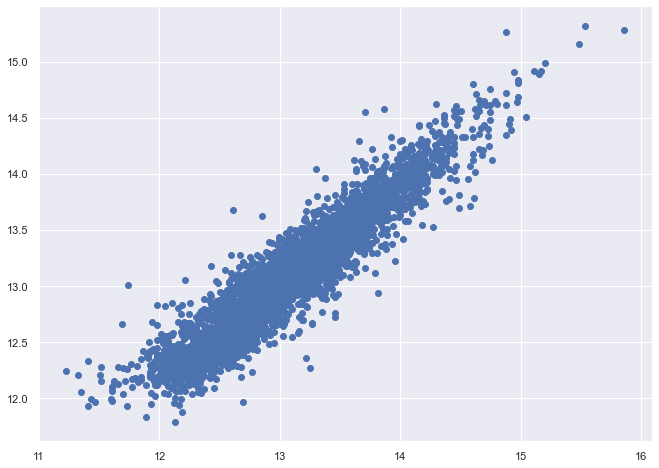

In [225]:
rnd_reg_grid_best.fit(X_train,y_train)
y_pred = rnd_reg_grid_best.predict(X_test)

print('Train Score: ',rnd_reg_grid_best.score(X_train, y_train))
print('-'*40)
print('Test Score: ',rnd_reg_grid_best.score(X_test, y_test))
print('-'*40)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


plt.scatter(y_test['price'], y_pred)

In [226]:
rf_ran_param_dist = {"n_estimators":sp_randint(50, 400),
              "max_depth": sp_randint(1, 15),
              "max_features":sp_randint(1, 15),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True],
              "max_features" :['auto', 'sqrt']
             }
rnd_reg_random_best = randomised_hyperparam_tunning("RandomForest Regressor",RandomForestRegressor(),rf_ran_param_dist,25)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'bootstrap': True, 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 267}
RandomForest Regressor Prediction R2-score: 0.87
RandomForest Regressor Prediction RMSE: 0.17413298448537315


In [227]:
rnd_reg_random_best.fit(X_train,y_train)
y_pred = rnd_reg_random_best.predict(X_test)

print('Train Score: ',rnd_reg_random_best.score(X_train, y_train))
print('-'*40)
print('Test Score: ',rnd_reg_random_best.score(X_test, y_test))
print('-'*40)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Train Score:  0.9596619224352781
----------------------------------------
Test Score:  0.8892620618329115
----------------------------------------
MAE: 0.12337402693118488
MSE: 0.030270691121867834
RMSE: 0.1739847439342537


# Feature Importance using Random Forest 

Text(0, 0.5, 'Names of the Features')

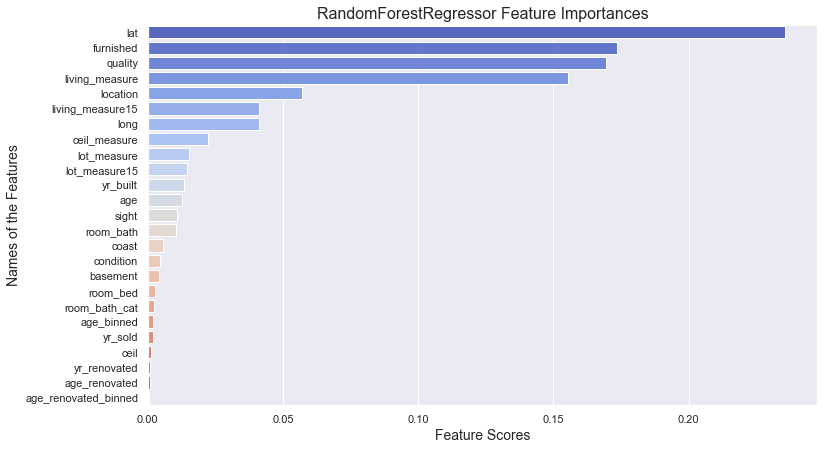

In [228]:
x_ax, y_ax = (list(x) for x in zip(*sorted(zip(rnd_reg_grid_best.feature_importances_, X_train.columns), 
                                                            reverse = True)))

d = {'feature_scores': x_ax, 'feature_names': y_ax}
result_df = pd.DataFrame(data=d)

fig, ax = plt.subplots(figsize=(12,7))
ax = sns.barplot(x='feature_scores', y='feature_names', data=result_df, palette="coolwarm")
plt.title('RandomForestRegressor Feature Importances', fontsize=16)
plt.xlabel('Feature Scores', fontsize=14)
plt.ylabel('Names of the Features', fontsize=14)

### Features which are most important in predicting the price with help of Random forest are  <br>
     Latitude , quality , living measure , furnished 

### Lets drop the less important variables from the model and work with the important one and check the performance of the model 

In [229]:
var_drop = []

for i,v in enumerate(y_ax) :
     if x_ax[i] < 0.0090 :
         var_drop.append(v)
         print(x_ax[i])
         print(y_ax[i])

0.005680377934462915
coast
0.004506310002755901
condition
0.004328850121660054
basement
0.0025591856202950574
room_bed
0.0022866364544661738
room_bath_cat
0.001896579095828199
age_binned
0.0018085479099541296
yr_sold
0.0013715279094958228
ceil
0.0009687933610467316
yr_renovated
0.0009666697775069334
age_renovated
0.0006402913429222585
age_renovated_binned


In [230]:
X_train_less = X_train.drop(var_drop, axis=1)
X_test_less  = X_test.drop(var_drop, axis=1)

### Performing hyperparameter tuning , gridsearch one more time on less features

In [231]:
def gridsearch_with_less_param(model_name,reg_model,param_grid):
    model = reg_model
    ran_model = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose=2, n_jobs = -1,scoring='neg_mean_squared_error', return_train_score=True)
    # Fit the random search model
    ran_model.fit(X_train_less,y_train.values.ravel())
    print(ran_model.best_params_)
    y_hat = ran_model.predict(X_test_less)
    print( model_name + " Prediction R2-score: {}".format(round(r2_score(y_hat, y_test),4)))
    print(model_name + ' Prediction RMSE:', np.sqrt(mean_squared_error(y_hat,y_test)))    
    return ran_model.best_estimator_

In [232]:
rf_param_grid =  {'n_estimators': [180,225,250,280,300,350,400],
       'max_features': ['auto', 'sqrt',5,10,14],
      'bootstrap': [True],
      'max_depth' : [5,10,15],                                
    }
forest_reg = RandomForestRegressor(random_state=1)
rnd_reg_grid_best = gridsearch_with_less_param("Random Forest Regressor",forest_reg,rf_param_grid)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
{'bootstrap': True, 'max_depth': 15, 'max_features': 5, 'n_estimators': 300}
Random Forest Regressor Prediction R2-score: 0.8668
Random Forest Regressor Prediction RMSE: 0.1742421897955619


In [233]:
rnd_reg_grid_best.fit(X_train_less, y_train)
y_pred = rnd_reg_grid_best.predict(X_test_less)
print('Train Score: ',rnd_reg_grid_best.score(X_train_less, y_train))
print('-'*40)
print('Test Score: ',rnd_reg_grid_best.score(X_test_less, y_test))
print('-'*40)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Train Score:  0.9668872702696424
----------------------------------------
Test Score:  0.8889341007062153
----------------------------------------
MAE: 0.12399551707864687
MSE: 0.030360340704752624
RMSE: 0.1742421897955619


In [234]:
def randomised_with_less_param(model_name,reg_model,param_grid,n_iter_p):
    model = reg_model
    ran_model = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = n_iter_p, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    ran_model.fit(X_train_less,y_train.values.ravel())
    print(ran_model.best_params_)
    y_hat = ran_model.predict(X_test_less)
    print( model_name + " Prediction R2-score: {}".format(round(r2_score(y_hat, y_test),4)))
    print(model_name + ' Prediction RMSE:', np.sqrt(mean_squared_error(y_hat,y_test)))
    
    return ran_model.best_estimator_

In [235]:
rf_ran_param_dist = {"n_estimators":sp_randint(50, 400),
              "max_depth": sp_randint(1, 15),
              "max_features":sp_randint(1, 15),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True],
              "max_features" :['auto', 'sqrt']
             }
rnd_reg_random_best = randomised_with_less_param("RandomForest Regressor",RandomForestRegressor(),rf_ran_param_dist,25)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'bootstrap': True, 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 267}
RandomForest Regressor Prediction R2-score: 0.8674
RandomForest Regressor Prediction RMSE: 0.17650829781112726


In [236]:
rnd_reg_random_best.fit(X_train_less, y_train)
y_pred = rnd_reg_random_best.predict(X_test_less)
print('Train Score: ',rnd_reg_random_best.score(X_train_less, y_train))
print('-'*40)
print('Test Score: ',rnd_reg_random_best.score(X_test_less, y_test))
print('-'*40)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Train Score:  0.957873219504398
----------------------------------------
Test Score:  0.8859557970402098
----------------------------------------
MAE: 0.1252982310454896
MSE: 0.031174472806478674
RMSE: 0.17656294290274693


### We dont see much difference in the Test score after dropping the less important features

## Random Forest - Price Prediction

### Lets see how much diffrence it makes in predicting the House price when we change value of Quality

In [259]:
sample_1 = X_test_less.tail(1)
sample_1['quality'] = '7'
# print('an example where quality is =' + str(sample_1['quality'].values[0]))
print('predicted house value is ')
print(np.exp(rnd_reg_grid_best.predict(sample_1)))
print('--------------------------------')

sample_1['quality'] = 6
# print('have changed quality for the same example and value of quality is =' + str(sample_1['quality'].values[0]))
print('predicted house value this time is ')
print(np.exp(rnd_reg_grid_best.predict(sample_1)))

predicted house value is 
[759213.44606293]
--------------------------------
predicted house value this time is 
[740812.62903787]


# We see change in the house price value as we change the quality of the house. As quality of house is deceased house price went down by 2k 

### Accurancy range with 95% Confidence interval for Random forest 

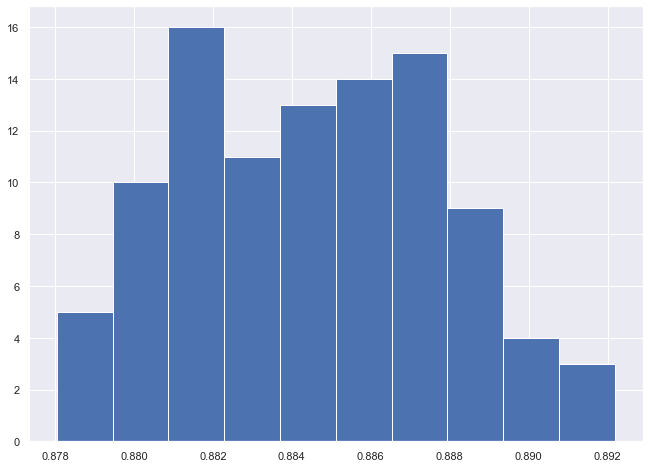

95.0 confidence interval 87.9% and 89.1%


In [264]:
X = housing_df_model.drop({'price'}, axis=1)
y = housing_df_model[['price']]
# configure bootstrap
n_iterations = 100
n_size = int(len(X) * 0.50)
values = house_df_model.values
# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=i)
    X_train_less = X_train.drop(var_drop, axis=1)
    X_test_less  = X_test.drop(var_drop, axis=1)
    	# fit model
    rfb = rnd_reg_grid_best.fit(X_train_less, y_train)
	# evaluate model
    score = rfb.score(X_test_less, y_test)
    stats.append(score)
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

### I used around 100 samples to establish the interval for Random forest and we can expect R2 score between 0.878 to 0.891

In [265]:
rnd_reg_grid_best

RandomForestRegressor(max_depth=15, max_features=5, n_estimators=300,
                      random_state=1)

In [266]:
# Final list of features we have to use for Random Forest
print(X_train_less.columns)

Index(['room_bath', 'living_measure', 'lot_measure', 'sight', 'quality',
       'ceil_measure', 'yr_built', 'lat', 'long', 'living_measure15',
       'lot_measure15', 'furnished', 'location', 'age'],
      dtype='object')


### Conclusion

We have done our analysis on various parametric and non-parametric algorithms and by considering  below points
* Performance and Hardware Limitations
* While evaluating and Fine Tuning which model had shorter training time.
* Which model was easy to interpret 
* Which model would be Easier to implement in production
* Reduced risk of data errors during model use

We have concluded that we will keep both one parametric and one non parametric models in production. These models are
* Random Forest Regressor (with 95% confidence interval accuracy range is  between 88 to 89)
* Linear Regressor (with 95% confidence interval accuracy range is  between 83 to 84)

Random Forest Model will be using 14 parameter whereas Linear Regression Model will be using all 25 parameters.

We will keep monitoring deviation (i.e. RMSE) from actual prediction and its root cause and will keep fine tuning our model time to time for better result.


